<a href="https://colab.research.google.com/github/YasminaNasser/Stroke-Prediction-Data-Mining/blob/main/Stroke_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members:**


- Nour Tarek Adel 21p0399
- Farida Waleed Fakhry 21P0167
- Malak Ahmed Yehia 2001350
- Yomna Mohamed Hachem 21P0189
- Yasmina Nasser Hamam 21P0211
- Brwana Ahmed Mourad 20P1346

**GitHub Repo:**

[Stroke-Prediction-Repo](https://colab.research.google.com/github/YasminaNasser/Stroke-Prediction-Data-Mining/blob/google-collab/Stroke_Prediction.ipynb#scrollTo=Jsudh3c5EcU5)



In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)

In [3]:
# from google.colab import files
# upload =files.upload()

# Step 1 | Data overview


In [4]:

df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- id: Identification number of the individual.
- gender: Gender of the individual.
- hypertension: Health related parameter, does person have hypertension.
- heart_disease: Health related parameter, does person have heart disease.
- ever_married: Personal information, is person married on not?
- work_type: Nature of work place.
- Residence_type: Residence type of the individual.
- avg_glucose_level: average glucose level in blood for the individual.
- bmi: body mass index of the individual.
- smoking_status: Habitual information. Current smoking status of individual.
- stroke: Our taget, is person suffered heart attack?

In [5]:
# Display the shape of the DataFrame after removing duplicates
df.shape

(5110, 12)

In [6]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 11 features and 1 output variable


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
def column_info(df):
  cols=[]
  dtypes=[]
  unique_values=[]
  nunique_values=[]

#loop ala kol columns
  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype)
    unique_values.append(df[col].unique())
    nunique_values.append(df[col].nunique())

#return dataframe fe dictionnaries
  return pd.DataFrame({'column_name':cols,
                        'data_type':dtypes,
                        'unique_values':unique_values,
                        'nunique_values':nunique_values})

column_info(df)

,column_name,data_type,unique_values,nunique_values
0,id,int64,"[9046, 51676, 31112, 60182, 1665, 56669, 53882...",5110
1,gender,object,"[Male, Female, Other]",3
2,age,float64,"[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....",104
3,hypertension,int64,"[0, 1]",2
4,heart_disease,int64,"[1, 0]",2
5,ever_married,object,"[Yes, No]",2
6,work_type,object,"[Private, Self-employed, Govt_job, children, N...",5
7,Residence_type,object,"[Urban, Rural]",2
8,avg_glucose_level,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2...",3979
9,bmi,float64,"[36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8...",418


### 1.1 Describe Data

In [9]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [10]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Initial Insights:**

Data from bmi feature is missing.

Both Categorical and numerical features are present.

- Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
- Binary Numerical Features: hypertension,heart_disease, stroke
- Continous Numerical Features: age, avg_glucose_level, bmi

Most of the data is categorical which need a special attention to visualize those.

Feature extraction can be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.

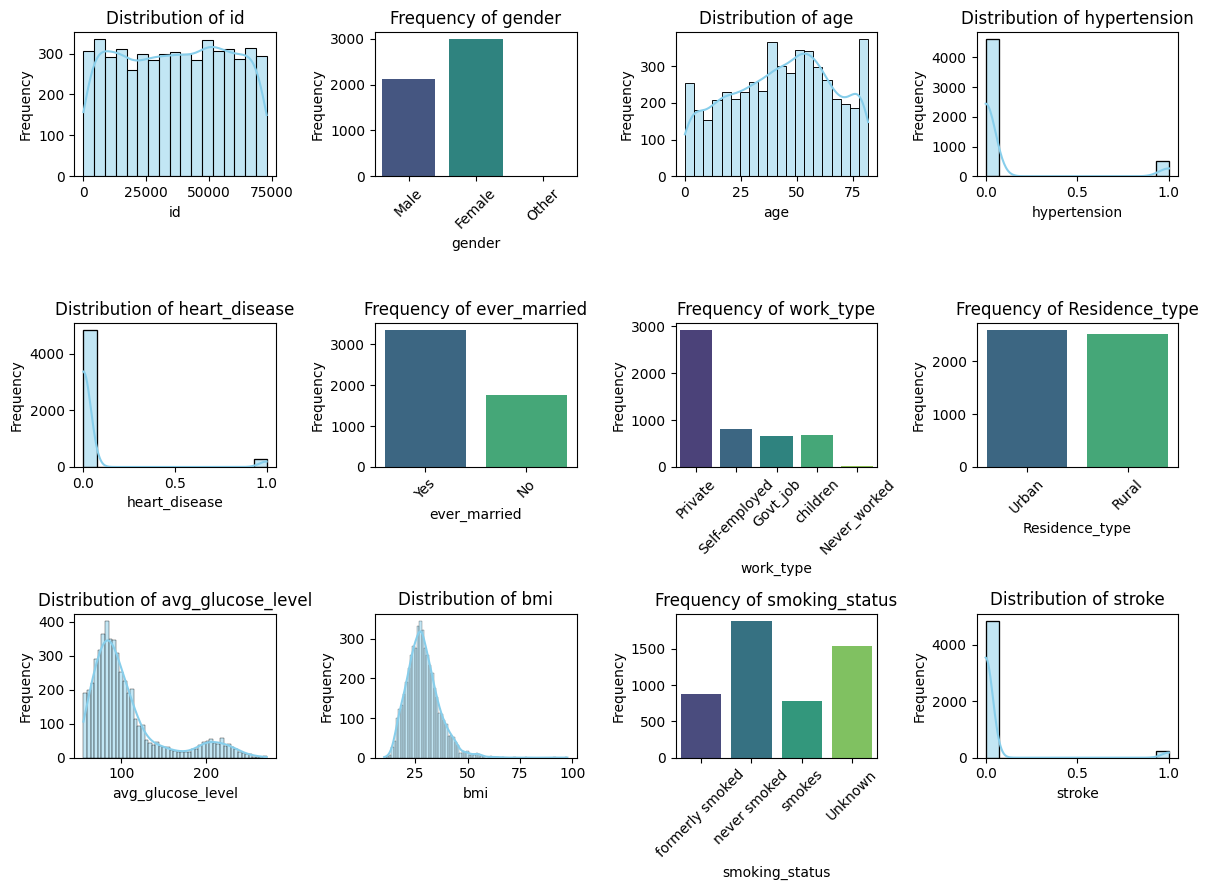

In [11]:
def visualize_and_summary(df):

    # Number of columns for 4 graphs per row
    n_cols = 4
    n_rows = (len(df.columns) // n_cols) + (1 if len(df.columns) % n_cols != 0 else 0)

    # Set up the plot grid for side-by-side comparison of columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3 * n_cols, 3* n_rows))

    # Flatten the axes array to make it easier to iterate through
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]

        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Categorical data - plot frequency distribution
            sns.countplot(x=df[col], ax=ax, hue=df[col], palette='viridis', legend=False)
            ax.set_title(f'Frequency of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.tick_params(axis='x', rotation=45)
        else:
            # Numerical data - plot histogram
            sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
            ax.set_title(f'Distribution of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')

    # Adjust layout for better spacing between plots
    plt.tight_layout()
    plt.show()

# Call the function to visualize and summarize
visualize_and_summary(df)

Scatter Plot between each feature and target column

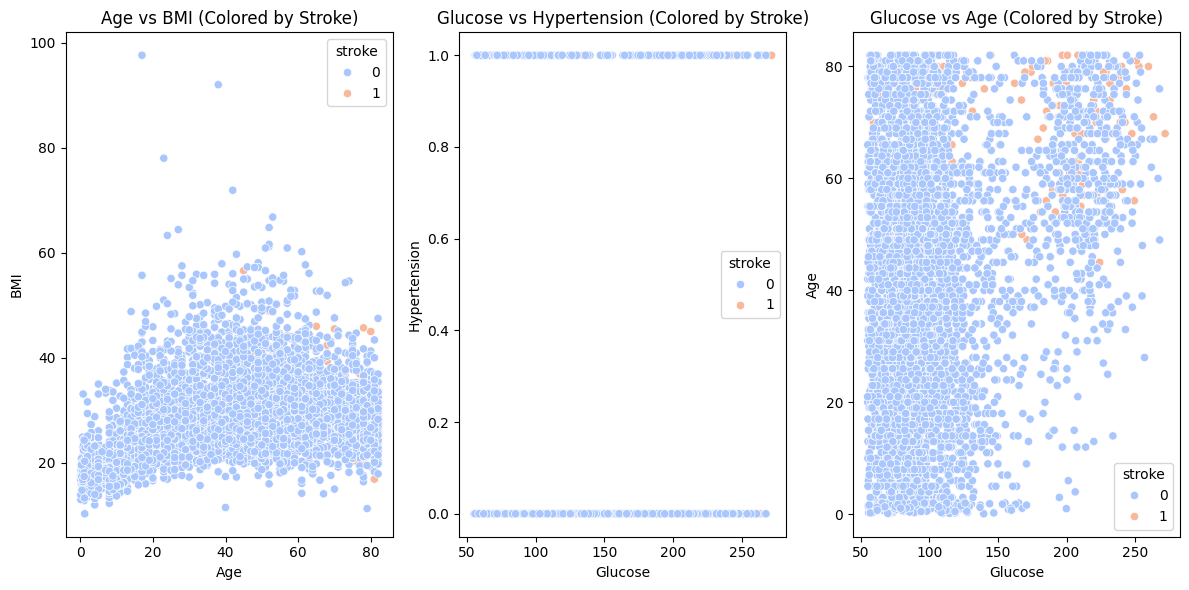

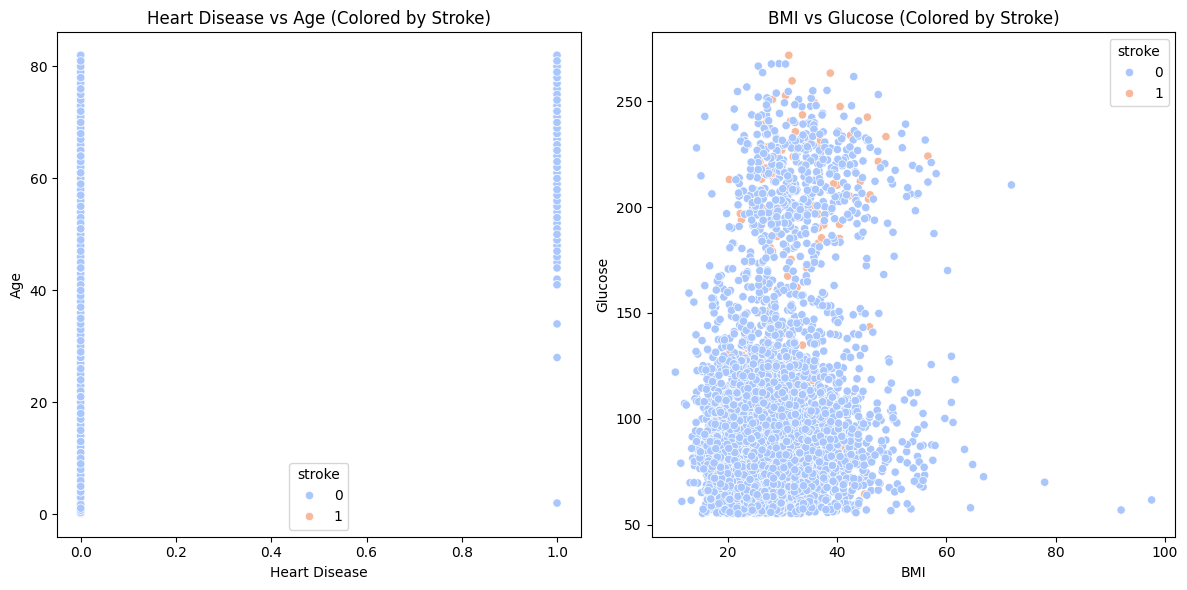

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and it's already loaded

# Create a figure for side-by-side scatter plots between different features
plt.figure(figsize=(12, 6))

# Scatter plot for 'age' vs 'bmi' (first plot)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, palette='coolwarm')
plt.title('Age vs BMI (Colored by Stroke)')
plt.xlabel('Age')
plt.ylabel('BMI')

# Scatter plot for 'glucose' vs 'hypertension' (second plot)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.scatterplot(x='avg_glucose_level', y='hypertension', hue='stroke', data=df, palette='coolwarm')
plt.title('Glucose vs Hypertension (Colored by Stroke)')
plt.xlabel('Glucose')
plt.ylabel('Hypertension')

# Scatter plot for 'glucose' vs 'age' (third plot)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.scatterplot(x='avg_glucose_level', y='age', hue='stroke', data=df, palette='coolwarm')
plt.title('Glucose vs Age (Colored by Stroke)')
plt.xlabel('Glucose')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Create another figure for additional scatter plots between different features
plt.figure(figsize=(12, 6))

# Scatter plot for 'heart_disease' vs 'age' (first plot)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.scatterplot(x='heart_disease', y='age', hue='stroke', data=df, palette='coolwarm')
plt.title('Heart Disease vs Age (Colored by Stroke)')
plt.xlabel('Heart Disease')
plt.ylabel('Age')

# Scatter plot for 'bmi' vs 'glucose' (second plot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=df, palette='coolwarm')
plt.title('BMI vs Glucose (Colored by Stroke)')
plt.xlabel('BMI')
plt.ylabel('Glucose')

plt.tight_layout()
plt.show()

Some Insights:


*   **(Age vs BMI)** Patients whose age is more than 40 has the maximum possibility of getting stroke and BMI within 20 to 50.



*   **(Glucose vs Hypertension)** Patients with varying glucose levels and hypertension show a clear distinction in stroke occurrence, as indicated by the color gradient in the scatter plot. Patients with higher glucose levels and hypertension appear more likely to have a stroke, as suggested by the color shift towards a higher occurrence of strokes (typically shown in red). This indicates a potential correlation between higher glucose levels, hypertension, and the increased likelihood of stroke occurrence in the dataset.


*   **(Glucose vs Age)** Patient having the maximum possibility of getting a stroke whose Age within 40 to 80.


*    **(Heat Disease vs Age)** Patients with heart disease across all age groups show no variation in stroke occurrence, as indicated by the uniform blue color in the scatter plot. This suggests that, in this dataset, the presence of heart disease does not correlate with the occurrence of a stroke in patients.




*   **(Glucose vs BMI)** Patients whose glucose level is between 200-250 and bmi between 20-40 are very likely to have a stroke

### 1.2  Categorical Features

In [13]:
# Extract categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Better display for the extracted categorical features
print("=" * 60)
print("          Extracting Categorical Features           ")
print("=" * 60)
print(f"Categorical Features ({len(categorical_features)}):")
print("-" * 60)
print(", ".join(categorical_features))
print("=" * 60)


          Extracting Categorical Features           
Categorical Features (5):
------------------------------------------------------------
gender, ever_married, work_type, Residence_type, smoking_status


In [14]:
# Process each categorical feature
for feature in categorical_features:
    print("=" * 60)
    print(f"          Processing Feature: {feature}          ")
    print("=" * 60)

    # Get value counts for the feature
    value_counts = df[feature].value_counts(dropna=False)

    # Display the value counts with better formatting
    print(f"\nValue Counts for '{feature}':")
    print("-" * 60)
    print(value_counts)
    print("=" * 60)


          Processing Feature: gender          

Value Counts for 'gender':
------------------------------------------------------------
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
          Processing Feature: ever_married          

Value Counts for 'ever_married':
------------------------------------------------------------
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
          Processing Feature: work_type          

Value Counts for 'work_type':
------------------------------------------------------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
          Processing Feature: Residence_type          

Value Counts for 'Residence_type':
------------------------------------------------------------
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
          Processing Feature: smoking_status          

Value Coun

### 1.2  Numerical Features

In [15]:
# Extract numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("------------------Extracting Numerical Features------------------")
print("Numerical Features:", numerical_features)

# Process each numerical feature
for feature in numerical_features:
    print(f"\nProcessing Feature: {feature}")

    # Get basic statistics for the feature
    feature_stats = df[feature].describe()
    print(f"Basic Statistics:\n{feature_stats}")

    # Get missing values count
    missing_values = df[feature].isna().sum()
    print(f"Missing Values: {missing_values}")

    # Get skewness
    skewness = df[feature].skew()
    print(f"Skewness: {np.round(skewness, 2)}")

    # Get the range (min and max)
    feature_range = df[feature].min(), df[feature].max()
    print(f"Range: {feature_range}")


------------------Extracting Numerical Features------------------
Numerical Features: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

Processing Feature: id
Basic Statistics:
count     5110.000000
mean     36517.829354
std      21161.721625
min         67.000000
25%      17741.250000
50%      36932.000000
75%      54682.000000
max      72940.000000
Name: id, dtype: float64
Missing Values: 0
Skewness: -0.02
Range: (67, 72940)

Processing Feature: age
Basic Statistics:
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
Missing Values: 0
Skewness: -0.14
Range: (0.08, 82.0)

Processing Feature: hypertension
Basic Statistics:
count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dt

# Step 2 | Preprocessing Techniques


## 2.1 Check Nulls

In [16]:
# check null
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


the missing values of bmi are nulls.

In [17]:
print((df.isna().sum()/len(df))*100)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


### 2.1.2 Visualization

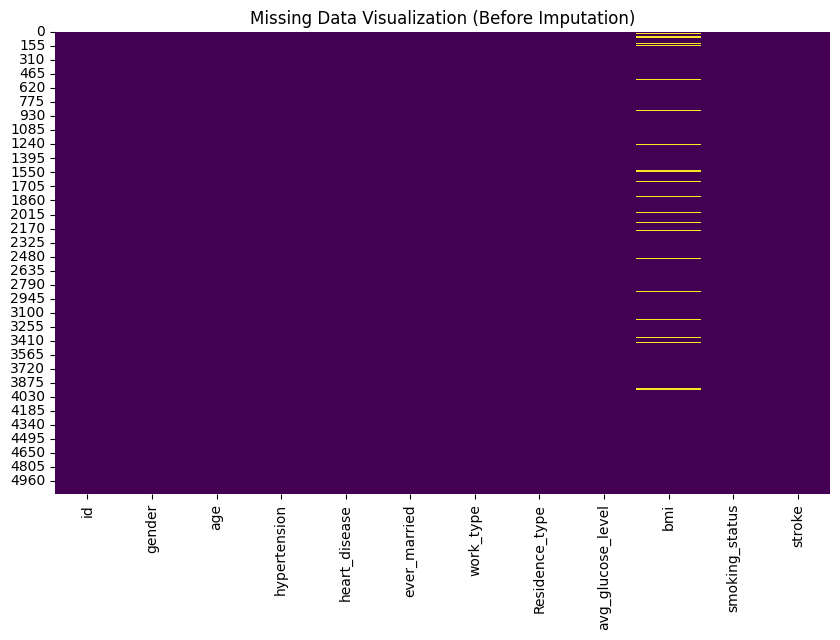

In [18]:
# Visualization of missing data before imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data Visualization (Before Imputation)')
plt.show()

### 2.1.3 Imputations of nulls

#### 2.1.3.1 Extracting Numerical Features

In [19]:
# Identify numerical features (excluding the last column)
numerical_features = df.iloc[:, :-1].select_dtypes(include=[np.number]).columns.tolist()

print("------------------ Extracting Numerical Features ------------------")
print(numerical_features)

# Create a DataFrame with only numerical features (excluding the target column)
dataframe_N = df[numerical_features]

print("------------------ Numerical DataFrame ------------------------")
dataframe_N.head()

------------------ Extracting Numerical Features ------------------
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
------------------ Numerical DataFrame ------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0


#### 2.1.3.2 Impute with mean

In [20]:
# Replace NaN values with the mean of each column
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dataframe_N_imputed = imp_mean.fit_transform(dataframe_N)

# Convert the NumPy array back to a DataFrame with the original column names
dataframe_N_imputed = pd.DataFrame(dataframe_N_imputed, columns=numerical_features)

print("------------------ Data After Imputation ------------------------")
dataframe_N_imputed.head()


------------------ Data After Imputation ------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046.0,67.0,0.0,1.0,228.69,36.600000
1,51676.0,61.0,0.0,0.0,202.21,28.893237
2,31112.0,80.0,0.0,1.0,105.92,32.500000
3,60182.0,49.0,0.0,0.0,171.23,34.400000
4,1665.0,79.0,1.0,0.0,174.12,24.000000


## 2.2 Normalize after imputation

In [21]:
# Normalize the data to a range of [0, 1]
normalizer = MinMaxScaler(feature_range=(0, 1))
dataframe_N_normalized = normalizer.fit_transform(dataframe_N_imputed)

# Convert the normalized array back to a DataFrame with the original column names
dataframe_N_normalized = pd.DataFrame(dataframe_N_normalized, columns=numerical_features)

print("------------------ Data After Normalization ------------------------")
dataframe_N_normalized.head()

------------------ Data After Normalization ------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.123214,0.816895,0.0,1.0,0.801265,0.301260
1,0.708205,0.743652,0.0,0.0,0.679023,0.212981
2,0.426015,0.975586,0.0,1.0,0.234512,0.254296
3,0.824928,0.597168,0.0,0.0,0.536008,0.276060
4,0.021929,0.963379,1.0,0.0,0.549349,0.156930


## 2.3 Data After Handling Missing Values and Normalization

In [22]:
# Update the original dataset with the normalized numerical features
df[numerical_features] = dataframe_N_normalized

print("------------------- Data After Handling Missing Values and Normalization ---------------")
df.head()

------------------- Data After Handling Missing Values and Normalization ---------------


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,0.708205,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.679023,0.212981,never smoked,1
2,0.426015,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,0.824928,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,0.021929,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


##2.4 Check Duplicates

In [23]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

print("\n------------------Checking for Duplicate Rows------------------")
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    print("Duplicate Rows:\n", duplicate_rows)
else:
    print("No exact duplicate rows found.")



------------------Checking for Duplicate Rows------------------
No exact duplicate rows found.


## 2.5 Check Coorelation between features

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables directly in the original DataFrame
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Encoding categorical column: {col}")
    df[col] = LabelEncoder().fit_transform(df[col])

# Display the first few rows of the updated DataFrame
df.head()


Encoding categorical column: gender
Encoding categorical column: ever_married
Encoding categorical column: work_type
Encoding categorical column: Residence_type
Encoding categorical column: smoking_status


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0.708205,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,0.426015,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0.824928,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0.021929,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print all the features in the correlation matrix
print("\nFeatures in the Correlation Matrix:")
print(corr_matrix.columns.tolist())


Features in the Correlation Matrix:
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [26]:
# Display the correlation matrix as a DataFrame
corr_matrix

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,0.002999,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947


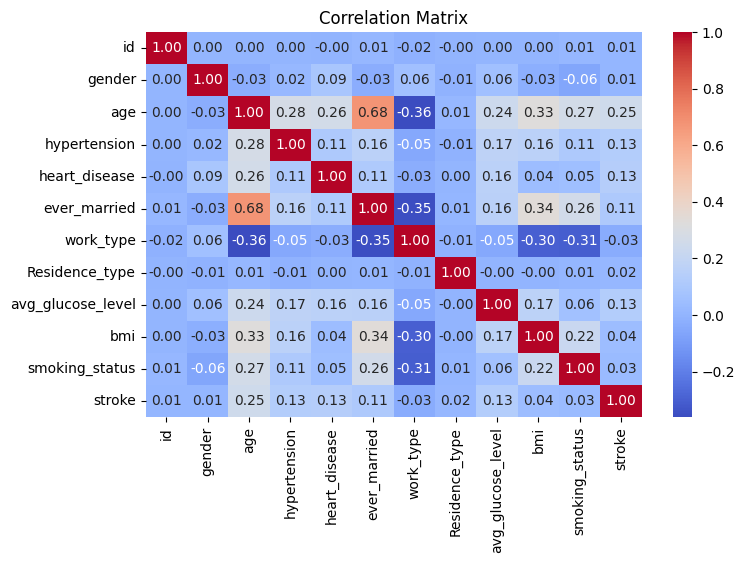

In [27]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

ever_married and age have strong relation.



Drop ID Column

In [28]:
df.drop(df.columns[0], axis=1, inplace=True)


Highly Correlated

In [29]:
# Initialize parameters
threshold = 0.8
reason = "The column is detected as not contributing significantly to other features."
columns_to_drop = []

# Iterate over each column to check its correlation with others
for column in corr_matrix.columns:
    # Get correlations of the current column with all others (excluding itself)
    column_correlation = corr_matrix[column].drop(column)

    # Check if all correlations are below the threshold
    if all(abs(column_correlation) > threshold) and column not in columns_to_drop:
        columns_to_drop.append(column)
        print(f"Detected '{column}' column as not contributing significantly to other columns, removing it.")
        print(f"Reason: {reason}")

# Display the list of columns to drop
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: []


Highly uncorrelated

In [30]:
# Initialize parameters
threshold = 0.003550
reason = "The column is detected as not contributing significantly to other features."
columns_to_drop = []

# Iterate over each column to check its correlation with others
for column in corr_matrix.columns:
    # Get correlations of the current column with all others (excluding itself)
    column_correlation = corr_matrix[column].drop(column)

    # Check if all correlations are below the threshold
    if all(abs(column_correlation) < threshold) and column not in columns_to_drop:
        columns_to_drop.append(column)
        print(f"Detected '{column}' column as not contributing significantly to other columns, removing it.")
        print(f"Reason: {reason}")

# Display the list of columns to drop
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: []


In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


##2.6 Saving Dataset After Preprocessing

In [32]:
df.to_csv('dataset_after_preprocessing.csv', index=False)

# Step 3 | Outliers Detection

In [33]:
df_preprocessed=pd.read_csv("/content/dataset_after_preprocessing.csv")


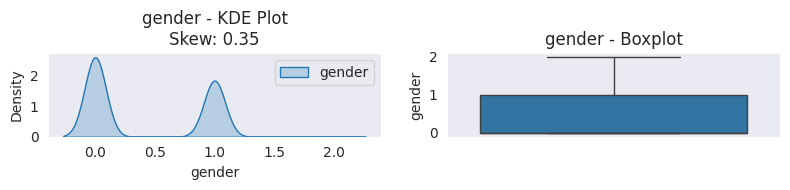

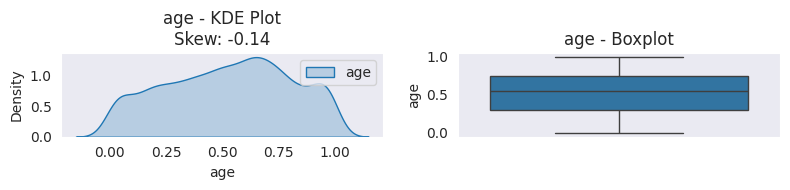

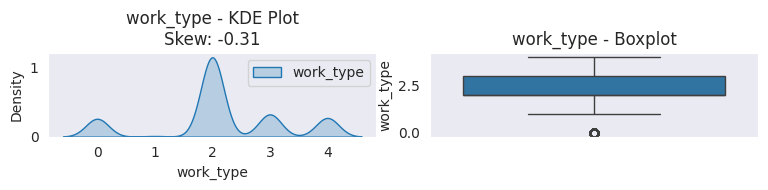

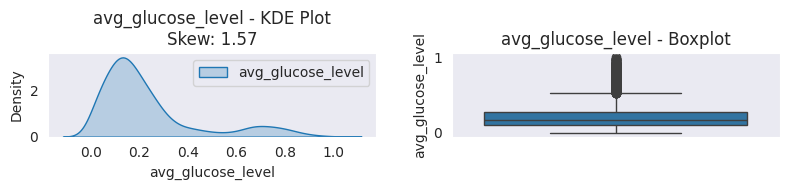

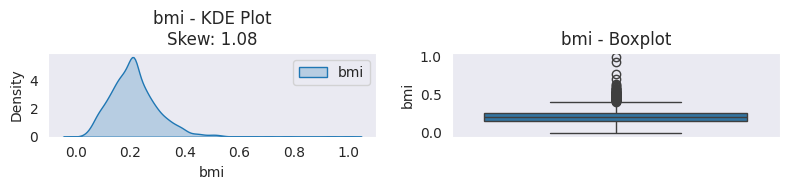

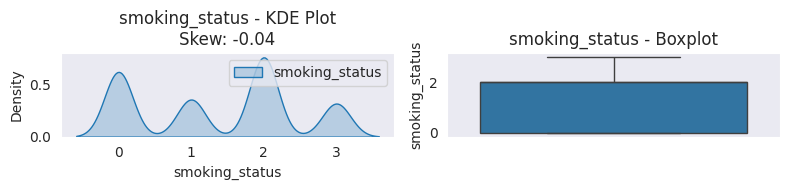

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('dark')

# Plot only for columns with more than 2 unique values and exclude 'stroke'
for col in df_preprocessed:
    if df_preprocessed[col].nunique() > 2 and col != 'stroke':  # Exclude binary columns and 'stroke'
        plt.figure(figsize=(8, 2))

        # KDE plot
        plt.subplot(1, 2, 1)
        sns.kdeplot(df_preprocessed[col], fill=True, label=col)  # Add label for legend
        plt.title(f"{col} - KDE Plot\nSkew: {np.round(df_preprocessed[col].skew(), 2)}")
        plt.legend()  # Now the legend will display the column name

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(df_preprocessed[col])
        plt.title(f"{col} - Boxplot")

        plt.tight_layout()
        plt.show()

### 3.1 Detect Using IQR

In [35]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)


In [36]:
# Calculating the percentage of outliers in each numerical column
iqr_flages = pd.DataFrame()

for column in df_preprocessed:
    if df_preprocessed[column].nunique() > 2:  # Exclude columns with only two unique values
        outliers = detect_outliers_iqr(df[column])
        iqr_flages[column] = outliers
        percentage = len(outliers[outliers == True]) / len(df[column]) * 100
        print(f"{column}: {percentage:.2f}% outliers")

iqr_out_indx_DF = iqr_flages.any(axis=1)
percentage = len(iqr_out_indx_DF[iqr_out_indx_DF == True]) / len(df[column]) * 100
print(f"Total: {percentage:.2f}% outliers")


gender: 0.00% outliers
age: 0.00% outliers
work_type: 12.86% outliers
avg_glucose_level: 12.27% outliers
bmi: 2.47% outliers
smoking_status: 0.00% outliers
Total: 24.87% outliers


In [37]:
# Print the frequency of each value in the 'gender' column
print(df_preprocessed['gender'].value_counts())


gender
0    2994
1    2115
2       1
Name: count, dtype: int64


### 3.2 Detect Using Z-score

In [38]:
def detect_outliers_zscore(column):
    colmean =  column.mean()
    colstd = column.std(ddof=0)
    DFZ = ((column - colmean)/colstd).copy()
    outliers = ((DFZ < -3) | (DFZ > 3))
    return outliers

In [39]:
# Print dataset info before handling outliers
print("Before handling outliers:")
df_preprocessed.info()

zscore_flags = pd.DataFrame()

# Loop through columns and detect outliers
for column in df_preprocessed:
    if df_preprocessed[column].nunique() > 2:  # Exclude columns with only two unique values
        outliers = detect_outliers_zscore(df[column])
        zscore_flags[column] = outliers
        percentage = len(outliers[outliers == True]) / len(df[column]) * 100
        print(f"{column}: {percentage:.2f}% outliers")

# Flatten the zscore_flags DataFrame to identify rows with any outlier
zscore_flags_any = zscore_flags.any(axis=1)

# Remove rows with outliers (where any column has outliers)
df_cleaned = df_preprocessed[~zscore_flags_any]

# Print out the total percentage of outliers removed
percentage_removed = len(zscore_flags_any[zscore_flags_any == True]) / len(df_preprocessed) * 100
print(f"Total: {percentage_removed:.2f}% outliers removed")

# Print dataset info after handling outliers
print("\nAfter handling outliers:")
df_cleaned.info()

# Display the cleaned DataFrame (optional)
df_cleaned.head()


Before handling outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 439.3 KB
gender: 0.02% outliers
age: 0.00% outliers
work_type: 0.00% outliers
avg_glucose_level: 0.96% outliers
bmi: 1.15% outliers
smoking_status: 0.00% outliers
Total: 2.13% outliers removed

After 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


In [40]:
df_cleaned.to_csv('dataset_after_handling_outliers.csv', index=False)

Regarding the avg_glucose_level , we used 2 measures of outlier detection since deleting 24.87% of our total dataset seemed too much and unreasonable, so removing outliers in this case would lead in loss of important information.

That's why we will focus more on the Z-Score outlier detection cleaned dataset moving forward

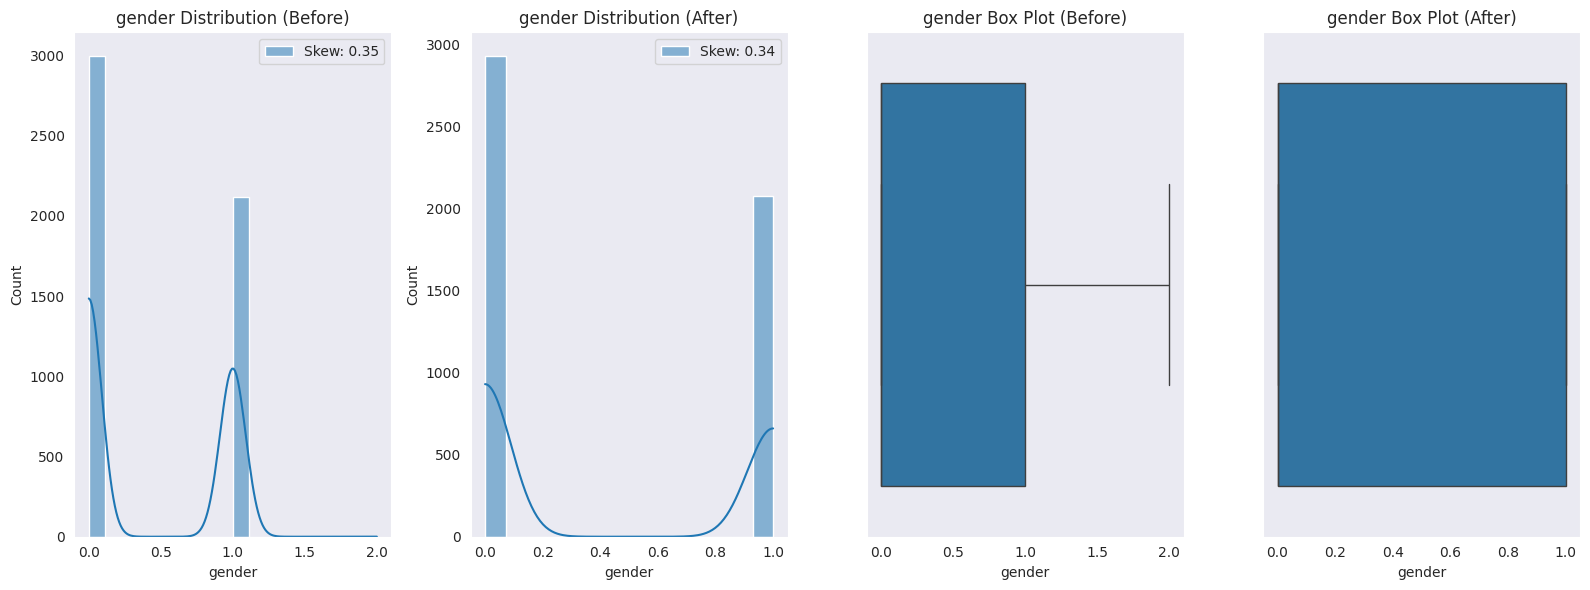

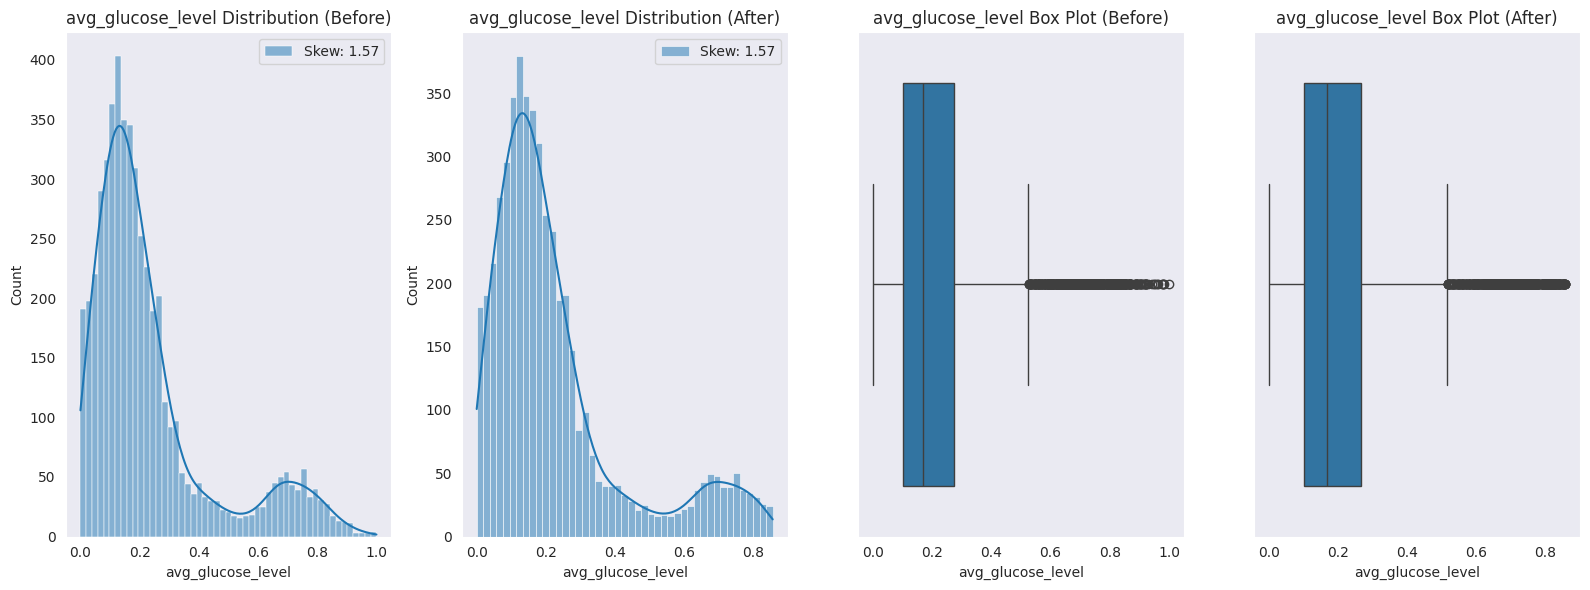

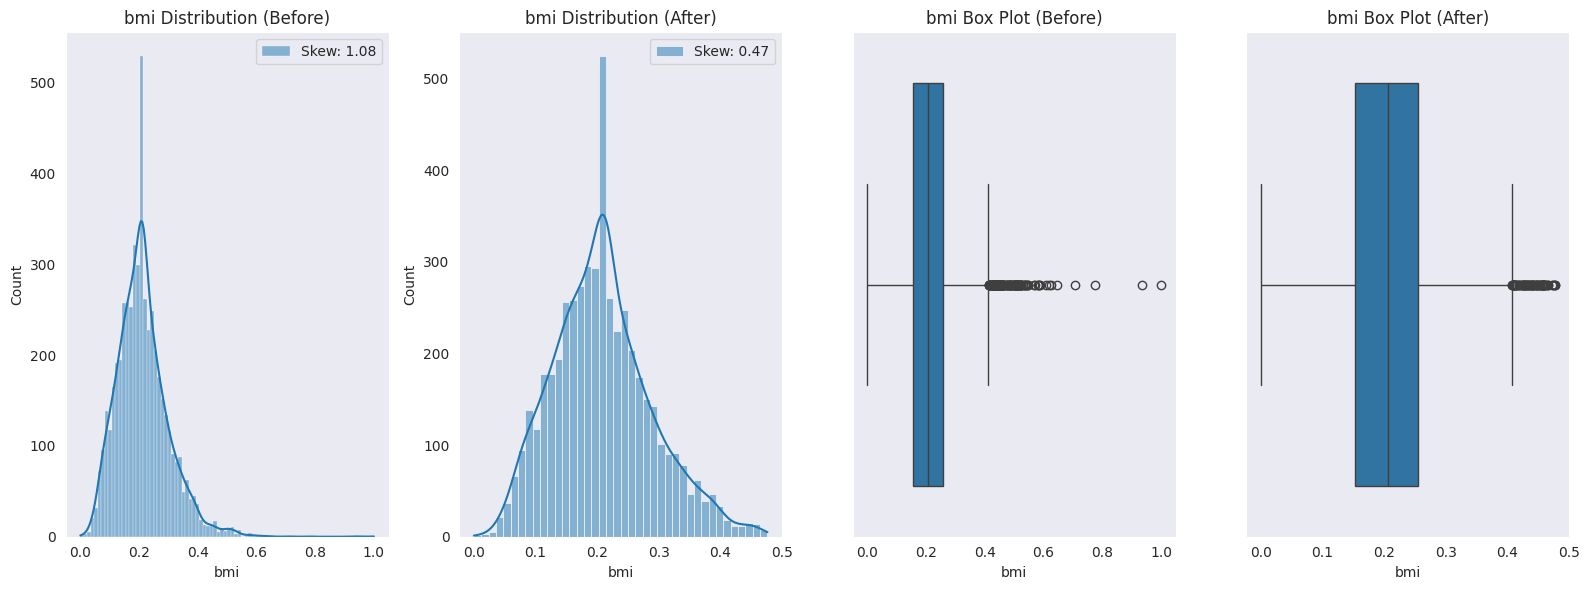

In [41]:
# Identify columns that had outliers detected
columns_with_outliers = [col for col in zscore_flags if zscore_flags[col].any()]

# Plot distributions and box plots for columns with outliers
for col in columns_with_outliers:
    plt.figure(figsize=(16, 6))

    # Distribution plot before outlier removal
    plt.subplot(141)
    sns.histplot(df_preprocessed[col], kde=True, label="Skew: " + str(np.round(df_preprocessed[col].skew(), 2)))
    plt.title(f'{col} Distribution (Before)')
    plt.legend()

    # Distribution plot after outlier removal
    plt.subplot(142)
    sns.histplot(df_cleaned[col], kde=True, label="Skew: " + str(np.round(df_cleaned[col].skew(), 2)))
    plt.title(f'{col} Distribution (After)')
    plt.legend()

    # Box plot before outlier removal
    plt.subplot(143)
    sns.boxplot(x=df_preprocessed[col])
    plt.title(f'{col} Box Plot (Before)')

    # Box plot after outlier removal
    plt.subplot(144)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Box Plot (After)')

    plt.tight_layout()
    plt.show()


**The dataset exhibits extreme class imbalance, with the majority class significantly outnumbering the minority class.
This imbalance can lead to biased models, where the model may predict the majority class most of the time.
To address this issue and improve model performance, we apply SMOTE (Synthetic Minority Over-sampling Technique)
to oversample the minority class and balance the class distribution.
such as resampling and feature adjustments, could be employed to enhance the model’s performance, we chose not to modify the target column. This decision was based on the sensitive nature of the data, particularly as it pertains to health-related information like stroke outcomes.**

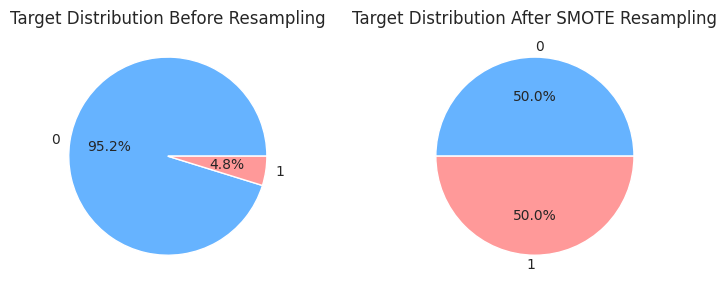

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.938965,0.0,0.0,1,2,0,0.118779,0.104238,0,0
1,0,0.768066,0.0,0.0,1,3,0,0.686686,0.184422,2,0
2,0,0.023438,0.0,0.0,0,4,0,0.325732,0.112257,0,0
3,0,0.548340,0.0,0.0,1,2,1,0.238713,0.249714,1,0
4,0,0.914551,0.0,1.0,0,3,1,0.252331,0.212981,0,1


In [42]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df_to_resample = pd.read_csv("/content/dataset_after_handling_outliers.csv")

# Separate features (X) and target (y)
X = df_to_resample.drop(columns=['stroke'])
y = df_to_resample['stroke']

# Create a figure for side-by-side pie charts
plt.figure(figsize=(8, 3))

# Visualize the target distribution before resampling (Pie chart)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Target Distribution Before Resampling")
plt.ylabel('')

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create a DataFrame for the resampled data
df_resampled = X_train_res.copy()
df_resampled['stroke'] = y_train_res

# Save the resampled data to a new CSV file
df_resampled.to_csv("/content/resampled_data.csv", index=False)

# Visualize the target distribution after resampling (Pie chart)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.pie(y_train_res.value_counts(), labels=y_train_res.value_counts().index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Target Distribution After SMOTE Resampling")
plt.ylabel('')

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

# Optionally, display the resampled data
df_resampled.head()

# Step 4 | Classifiers












##4.1 Loading Preprocessed and Cleaned Dataset

In [43]:
df_ready=pd.read_csv("/content/dataset_after_handling_outliers.csv")
df_ready.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0.0,1.0,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0.0,0.0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0.0,1.0,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0.0,0.0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1.0,0.0,1,3,0,0.549349,0.156930,2,1


##4.2 Splitting methods

In [44]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, TimeSeriesSplit
from sklearn.utils import resample
import pandas as pd
import numpy as np



def train_test_split_method(X, y, test_size=0.2, random_state=1):
    """
    Perform a simple train-test split.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def k_fold_split_method(X, y, n_splits=5, random_state=1):
    """
    Perform K-Fold Cross-Validation. Returns an iterator over train-test splits.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        yield X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
,
def stratified_k_fold_split_method(X, y, n_splits=5, random_state=1):
    """
    Perform Stratified K-Fold Cross-Validation. Returns an iterator over train-test splits.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in skf.split(X, y):
        yield X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


def train_val_test_split_method(X, y, val_size=0.2, test_size=0.2, random_state=1):
    """
    Perform a Train-Validation-Test Split.
    """
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(val_size + test_size), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (val_size + test_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

##4.3 Decision Tree Classifier

###4.3.1 Simple Train_test_split

Evaluating: max_depth=None
Evaluating: max_depth=5
Evaluating: min_samples_split=2
Evaluating: min_samples_split=10
Evaluating: min_samples_leaf=1
Evaluating: min_samples_leaf=5
Evaluating: criterion=gini
Evaluating: criterion=entropy
Model Evaluation Results Across Hyperparameters
max_depth=None: 90.21% accuracy
max_depth=5: 93.91% accuracy
min_samples_split=2: 90.21% accuracy
min_samples_split=10: 91.71% accuracy
min_samples_leaf=1: 90.21% accuracy
min_samples_leaf=5: 92.11% accuracy
criterion=gini: 90.21% accuracy
criterion=entropy: 90.11% accuracy
Best Hyperparameter Configuration: max_depth=5 with accuracy: 93.91%
Decision Tree Classification Score: 93.91

Classification Report for Best Model:
              precision  recall  f1-score  support
No Stroke          0.95    0.99      0.97   942.00
Stroke             0.42    0.08      0.14    59.00
accuracy           0.94    0.94      0.94     0.94
macro avg          0.68    0.54      0.55  1001.00
weighted avg       0.91    0.94      

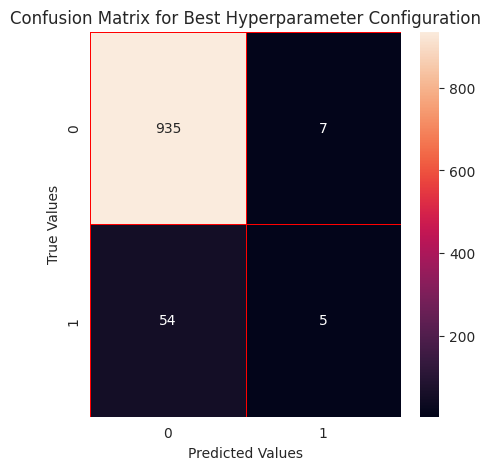

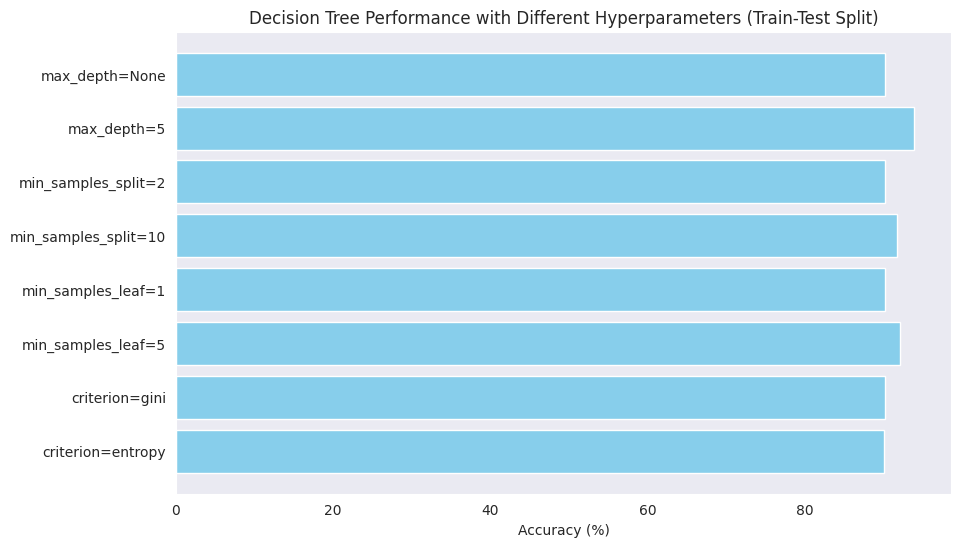

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Dataset splitting
X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store accuracy results
accuracy_results = {}
method_names = []  # List to store method names
method_scores = []  # List to store method scores

# Function to evaluate the model
def evaluate_model(y_true, y_pred, dataset_name):
    """
    Evaluates the model on a given dataset and prints metrics.
    Returns the accuracy of the model.
    """
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, cm, class_report

# Function to evaluate model with different hyperparameters
def evaluate_with_hyperparameters():
    global accuracy_results

    # Define hyperparameter combinations
    hyperparameters = {
        "max_depth=None": {"max_depth": None},
        "max_depth=5": {"max_depth": 5},
        "min_samples_split=2": {"min_samples_split": 2},
        "min_samples_split=10": {"min_samples_split": 10},
        "min_samples_leaf=1": {"min_samples_leaf": 1},
        "min_samples_leaf=5": {"min_samples_leaf": 5},
        "criterion=gini": {"criterion": "gini"},
        "criterion=entropy": {"criterion": "entropy"}
    }

    # Evaluate each hyperparameter combination
    for name, params in hyperparameters.items():
        print(f"Evaluating: {name}")
        clf = DecisionTreeClassifier(**params, random_state=42)
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Get accuracy, confusion matrix, and classification report
        accuracy, cm, class_report = evaluate_model(y_test, y_pred, "Test Set")

        # Store the results
        accuracy_results[name] = (accuracy, cm, class_report)

# Run the evaluation
evaluate_with_hyperparameters()

# Identify the best configuration
best_config = max(accuracy_results, key=lambda x: accuracy_results[x][0])
best_accuracy, best_confusion_matrix, best_class_report = accuracy_results[best_config]
print("=" * 50)
print("Model Evaluation Results Across Hyperparameters")
print("=" * 50)

for name, (accuracy, _, _) in accuracy_results.items():
    print(f"{name}: {accuracy * 100:.2f}% accuracy")

print("=" * 50)
print(f"Best Hyperparameter Configuration: {best_config} with accuracy: {best_accuracy * 100:.2f}%")

# Print the score for the best configuration in the same format as your example
print("Decision Tree Classification Score: {:.2f}".format(best_accuracy * 100))
method_names.append("Decision Tree")
method_scores.append(best_accuracy * 100)

# Print classification report for the best model
print("\nClassification Report for Best Model:")

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(best_class_report).transpose()

# Round values to two decimal places for cleaner display
print(class_report_df.round(2))


# Visualize the confusion matrix for the best configuration
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(best_confusion_matrix, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Best Hyperparameter Configuration")
plt.show()

# Visualize the comparison of test accuracies
plt.figure(figsize=(10, 6))
test_accuracies = [accuracy_results[key][0] * 100 for key in accuracy_results]
plt.barh(list(accuracy_results.keys()), test_accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Decision Tree Performance with Different Hyperparameters (Train-Test Split)')
plt.gca().invert_yaxis()  # To have the highest accuracy at the top
plt.show()


###4.3.2 Stratified__k_Fold_Split_method

Evaluating: max_depth=None
Evaluating: max_depth=5
Evaluating: min_samples_split=2
Evaluating: min_samples_split=10
Evaluating: min_samples_leaf=1
Evaluating: min_samples_leaf=5
Evaluating: criterion=gini
Evaluating: criterion=entropy
Model Evaluation Results Across Hyperparameters
max_depth=None: 91.66% accuracy
max_depth=5: 95.04% accuracy
min_samples_split=2: 91.66% accuracy
min_samples_split=10: 93.40% accuracy
min_samples_leaf=1: 91.66% accuracy
min_samples_leaf=5: 93.52% accuracy
criterion=gini: 91.66% accuracy
criterion=entropy: 90.82% accuracy
Best Hyperparameter Configuration: max_depth=5 with accuracy: 95.04%

Classification Report for Best Model:
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      4762
      Stroke       1.00      0.03      0.06       239

    accuracy                           0.95      5001
   macro avg       0.98      0.51      0.52      5001
weighted avg       0.96      0.95      0.93      5001



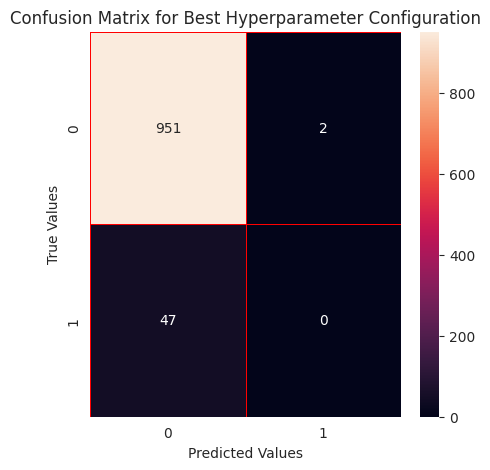

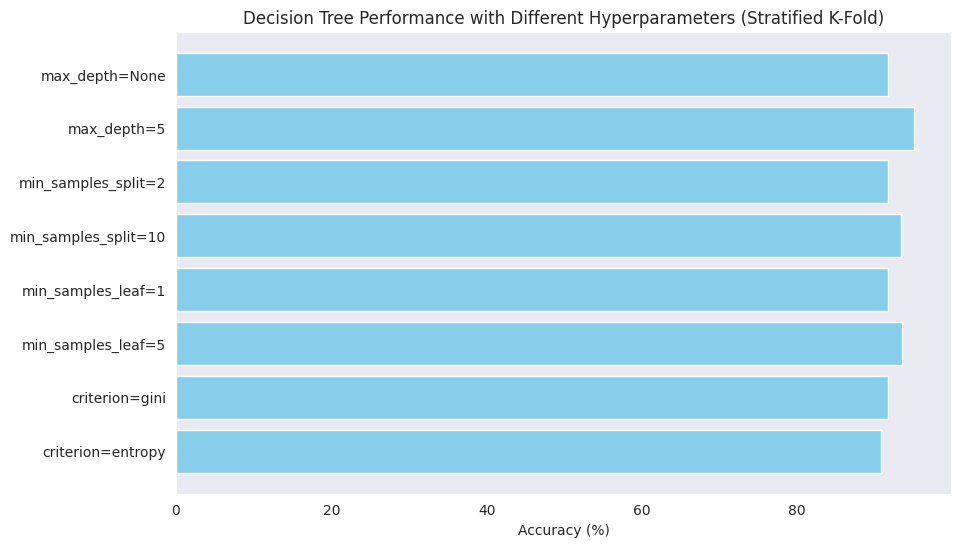

In [46]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_ready is your dataframe and it's already preprocessed
X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store average accuracy results for each hyperparameter configuration
accuracy_results = {}
confusion_matrices = {}

# Function to evaluate hyperparameters using Stratified K-Fold
def evaluate_with_hyperparameters():
    global accuracy_results, confusion_matrices

    # Define hyperparameter combinations
    hyperparameters = {
        "max_depth=None": {"max_depth": None},
        "max_depth=5": {"max_depth": 5},
        "min_samples_split=2": {"min_samples_split": 2},
        "min_samples_split=10": {"min_samples_split": 10},
        "min_samples_leaf=1": {"min_samples_leaf": 1},
        "min_samples_leaf=5": {"min_samples_leaf": 5},
        "criterion=gini": {"criterion": "gini"},
        "criterion=entropy": {"criterion": "entropy"}
    }

    # Evaluate each hyperparameter combination
    for name, params in hyperparameters.items():
        print(f"Evaluating: {name}")

        fold_accuracies = []  # Accuracy for each fold
        fold_conf_matrices = []  # Confusion matrices for each fold

        for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
            # Split data into training and test sets
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize and train the model with the current hyperparameters
            clf = DecisionTreeClassifier(**params, random_state=42)
            clf.fit(X_train, y_train)

            # Make predictions and calculate accuracy
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            fold_accuracies.append(accuracy)

            # Store the confusion matrix
            fold_conf_matrices.append(confusion_matrix(y_test, y_pred))

        # Store the average accuracy and a representative confusion matrix (from the last fold)
        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        accuracy_results[name] = avg_accuracy
        confusion_matrices[name] = fold_conf_matrices[-1]

# Run the evaluation
evaluate_with_hyperparameters()

# Identify the best configuration
best_config = max(accuracy_results, key=accuracy_results.get)
best_accuracy_stratified_k_fold = accuracy_results[best_config]
best_confusion_matrix = confusion_matrices[best_config]

# Print overall results
print("=" * 50)
print("Model Evaluation Results Across Hyperparameters")
print("=" * 50)
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy * 100:.2f}% accuracy")

print("=" * 50)
print(f"Best Hyperparameter Configuration: {best_config} with accuracy: {best_accuracy_stratified_k_fold * 100:.2f}%")

# Retrieve the best configuration directly from the dictionary
best_params = {
    "max_depth=None": {"max_depth": None},
    "max_depth=5": {"max_depth": 5},
    "min_samples_split=2": {"min_samples_split": 2},
    "min_samples_split=10": {"min_samples_split": 10},
    "min_samples_leaf=1": {"min_samples_leaf": 1},
    "min_samples_leaf=5": {"min_samples_leaf": 5},
    "criterion=gini": {"criterion": "gini"},
    "criterion=entropy": {"criterion": "entropy"}
}[best_config]

# Fit the model with the best configuration on the entire dataset
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X, y)  # Train on the whole dataset

# Make predictions on the whole dataset (you could also use a separate test set if available)
y_pred_best = best_clf.predict(X)

# Print the classification report for the best model
print("\nClassification Report for Best Model:")
class_report_best = classification_report(y, y_pred_best, target_names=['No Stroke', 'Stroke'])
print(class_report_best)

# Visualize the confusion matrix for the best configuration
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(best_confusion_matrix, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Best Hyperparameter Configuration")
plt.show()

# Visualize the accuracy results across hyperparameters
plt.figure(figsize=(10, 6))
test_accuracies = [accuracy_results[key] * 100 for key in accuracy_results]
plt.barh(list(accuracy_results.keys()), test_accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Decision Tree Performance with Different Hyperparameters (Stratified K-Fold)')
plt.gca().invert_yaxis()  # To have the highest accuracy at the top
plt.show()


###4.3.3 Train_Validation_Split


Model Evaluation Results Across Hyperparameters
max_depth=None: Validation Accuracy = 90.20%, Test Accuracy = 90.61%
max_depth=5: Validation Accuracy = 93.70%, Test Accuracy = 95.50%
min_samples_split=2: Validation Accuracy = 90.20%, Test Accuracy = 90.61%
min_samples_split=10: Validation Accuracy = 91.90%, Test Accuracy = 92.51%
min_samples_leaf=1: Validation Accuracy = 90.20%, Test Accuracy = 90.61%
min_samples_leaf=5: Validation Accuracy = 92.50%, Test Accuracy = 94.51%
criterion=gini: Validation Accuracy = 90.20%, Test Accuracy = 90.61%
criterion=entropy: Validation Accuracy = 91.10%, Test Accuracy = 92.21%
Best Hyperparameter Configuration for Validation Set: max_depth=5 with accuracy: 93.70%
Best Hyperparameter Configuration for Test Set: max_depth=5 with accuracy: 95.50%

Classification Report for Best Model (Test Set):
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98       957
      Stroke       0.00      0.00      0.00        4

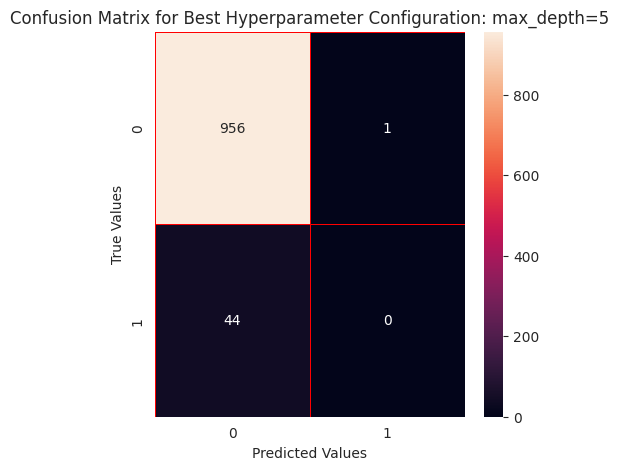

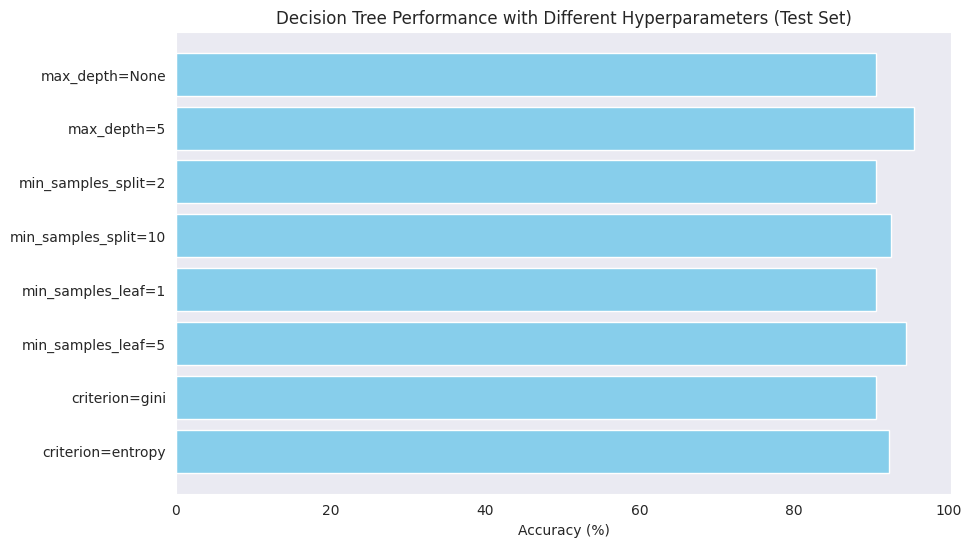

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Assuming `train_val_test_split_method` is defined elsewhere and returns split datasets
# Example: X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_method(X, y)

# Splitting the data
X = df_ready.drop(columns=['stroke'])  # Features
y = df_ready['stroke']  # Target column
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_method(X, y)

# Initialize a dictionary to store accuracy results
accuracy_results = {}
confusion_matrices = {}

# Function to evaluate model with different hyperparameters
def evaluate_with_hyperparameters():
    global accuracy_results, confusion_matrices

    # Define hyperparameter combinations
    hyperparameters = {
        "max_depth=None": {"max_depth": None},
        "max_depth=5": {"max_depth": 5},
        "min_samples_split=2": {"min_samples_split": 2},
        "min_samples_split=10": {"min_samples_split": 10},
        "min_samples_leaf=1": {"min_samples_leaf": 1},
        "min_samples_leaf=5": {"min_samples_leaf": 5},
        "criterion=gini": {"criterion": "gini"},
        "criterion=entropy": {"criterion": "entropy"}
    }

    print("=" * 50)
    print("Model Evaluation Results Across Hyperparameters")
    print("=" * 50)

    # Evaluate each hyperparameter combination
    for name, params in hyperparameters.items():
        clf = DecisionTreeClassifier(**params, random_state=42)
        clf.fit(X_train, y_train)

        # Make predictions
        val_pred = clf.predict(X_val)
        test_pred = clf.predict(X_test)

        # Get accuracy for validation and test sets
        val_accuracy = accuracy_score(y_val, val_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        # Store the results
        accuracy_results[name] = {"val_accuracy": val_accuracy, "test_accuracy": test_accuracy}
        confusion_matrices[name] = confusion_matrix(y_test, test_pred)  # Store confusion matrix for test set

        print(f"{name}: Validation Accuracy = {val_accuracy * 100:.2f}%, Test Accuracy = {test_accuracy * 100:.2f}%")

# Run the evaluation
evaluate_with_hyperparameters()

# Identify the best configuration
best_config_val = max(accuracy_results, key=lambda x: accuracy_results[x]["val_accuracy"])
best_config_test = max(accuracy_results, key=lambda x: accuracy_results[x]["test_accuracy"])
best_accuracy_val = accuracy_results[best_config_val]["val_accuracy"]
best_accuracy_test = accuracy_results[best_config_test]["test_accuracy"]

print("=" * 50)
print(f"Best Hyperparameter Configuration for Validation Set: {best_config_val} with accuracy: {best_accuracy_val * 100:.2f}%")
print(f"Best Hyperparameter Configuration for Test Set: {best_config_test} with accuracy: {best_accuracy_test * 100:.2f}%")

# Retrieve the best configuration for the test set
best_params = {
    "max_depth=None": {"max_depth": None},
    "max_depth=5": {"max_depth": 5},
    "min_samples_split=2": {"min_samples_split": 2},
    "min_samples_split=10": {"min_samples_split": 10},
    "min_samples_leaf=1": {"min_samples_leaf": 1},
    "min_samples_leaf=5": {"min_samples_leaf": 5},
    "criterion=gini": {"criterion": "gini"},
    "criterion=entropy": {"criterion": "entropy"}
}[best_config_test]

# Fit the model with the best configuration on the entire training data
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)  # Train on the training set

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Print the classification report for the best model
print("\nClassification Report for Best Model (Test Set):")
class_report_best = classification_report(y_test, y_pred_best, target_names=['No Stroke', 'Stroke'])
print(class_report_best)

# Visualize the confusion matrix for the best test accuracy configuration
best_confusion_matrix = confusion_matrices[best_config_test]
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(best_confusion_matrix, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title(f"Confusion Matrix for Best Hyperparameter Configuration: {best_config_test}")
plt.show()

# Visualize the comparison of test accuracies
plt.figure(figsize=(10, 6))
test_accuracies = [accuracy_results[key]["test_accuracy"] * 100 for key in accuracy_results]
plt.barh(list(accuracy_results.keys()), test_accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Decision Tree Performance with Different Hyperparameters (Test Set)')
plt.gca().invert_yaxis()  # To have the highest accuracy at the top
plt.show()


###4.3.4 K-Fold Cross Validation


Model Evaluation Results
max_depth=None: 91.12% accuracy
max_depth=5: 94.94% accuracy
max_depth=10: 92.78% accuracy
max_depth=15: 91.36% accuracy
max_depth=20: 91.20% accuracy
min_samples_split=2: 91.12% accuracy
min_samples_split=5: 91.70% accuracy
min_samples_split=10: 92.56% accuracy
min_samples_split=20: 93.60% accuracy
min_samples_leaf=1: 91.12% accuracy
min_samples_leaf=2: 92.26% accuracy
min_samples_leaf=5: 93.26% accuracy
min_samples_leaf=10: 94.56% accuracy
criterion=gini: 91.12% accuracy
criterion=entropy: 91.00% accuracy
Best Hyperparameter Configuration: max_depth=5 with accuracy: 94.94%

Classification Report for Best Model (Full Dataset):
              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98      4762
     Class 1       1.00      0.03      0.06       239

    accuracy                           0.95      5001
   macro avg       0.98      0.51      0.52      5001
weighted avg       0.96      0.95      0.93      5001



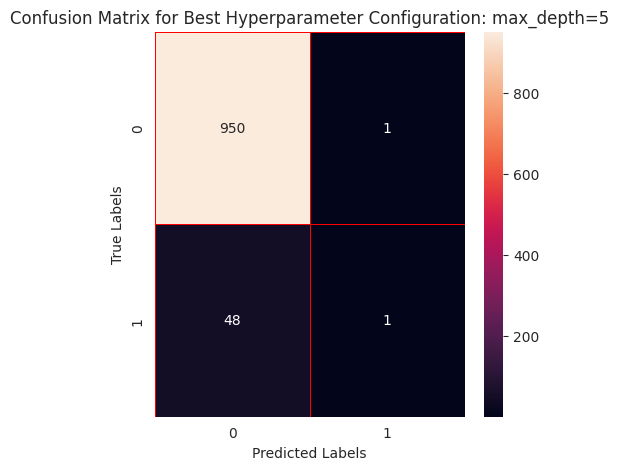

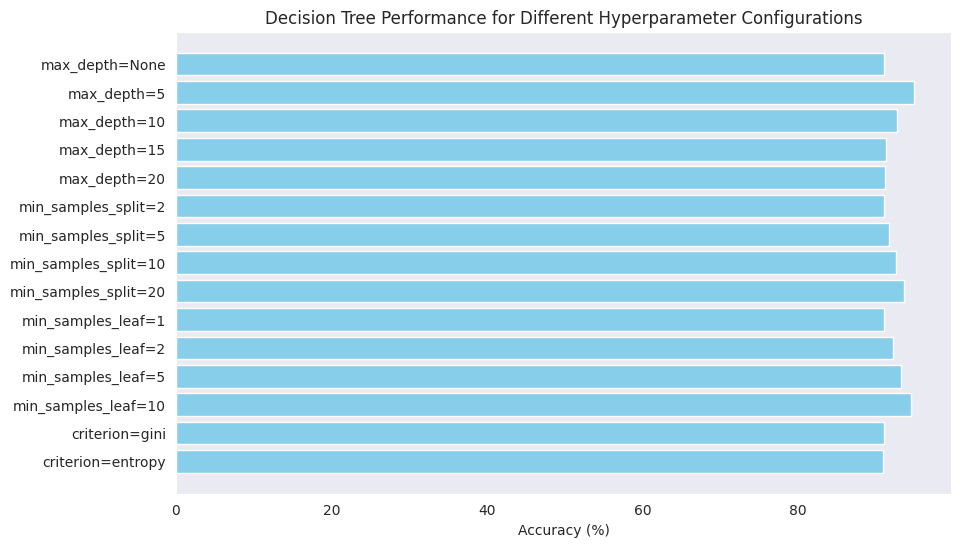

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Define the baseline classifier with default hyperparameters
baseline_clf = DecisionTreeClassifier(criterion='gini', max_depth=None,
                                      min_samples_split=2, min_samples_leaf=1,
                                      random_state=42)

# Initialize a dictionary to store accuracy results and confusion matrices
accuracy_results = {}
confusion_matrices = {}

# Function to evaluate model performance
def evaluate_model(clf, X, y):
    accuracies = []
    for X_train, X_test, y_train, y_test in k_fold_split_method(X, y):  # Assuming `k_fold_split_method` is defined elsewhere
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Store confusion matrix with string key based on hyperparameters
        # Only include max_depth for the key
        key = f"max_depth={clf.max_depth}"
        confusion_matrices[key] = confusion_matrix(y_test, y_pred)

    return np.mean(accuracies)

# 1. Varying max_depth
max_depth_values = [None, 5, 10, 15, 20]
for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth,
                                 min_samples_split=2, min_samples_leaf=1,
                                 random_state=42)
    avg_accuracy = evaluate_model(clf, X, y)
    accuracy_results[f"max_depth={depth}"] = avg_accuracy

# 2. Varying min_samples_split
min_samples_split_values = [2, 5, 10, 20]
for min_split in min_samples_split_values:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None,
                                 min_samples_split=min_split, min_samples_leaf=1,
                                 random_state=42)
    avg_accuracy = evaluate_model(clf, X, y)
    accuracy_results[f"min_samples_split={min_split}"] = avg_accuracy

# 3. Varying min_samples_leaf
min_samples_leaf_values = [1, 2, 5, 10]
for min_leaf in min_samples_leaf_values:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None,
                                 min_samples_split=2, min_samples_leaf=min_leaf,
                                 random_state=42)
    avg_accuracy = evaluate_model(clf, X, y)
    accuracy_results[f"min_samples_leaf={min_leaf}"] = avg_accuracy

# 4. Varying criterion
criteria = ['gini', 'entropy']
for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=None,
                                 min_samples_split=2, min_samples_leaf=1,
                                 random_state=42)
    avg_accuracy = evaluate_model(clf, X, y)
    accuracy_results[f"criterion={criterion}"] = avg_accuracy

# Print results
print("=" * 50)
print("Model Evaluation Results")
print("=" * 50)
for hyperparameter, avg_accuracy in accuracy_results.items():
    print(f"{hyperparameter}: {avg_accuracy * 100:.2f}% accuracy")

# Identify the best configuration
best_config = max(accuracy_results, key=accuracy_results.get)
best_config = f"max_depth={best_config.split('=')[1]}"
best_accuracy_cross_validation = accuracy_results[best_config]
print("=" * 50)
print(f"Best Hyperparameter Configuration: {best_config} with accuracy: {best_accuracy_cross_validation * 100:.2f}%")

# Retrieve the best configuration classifier
best_depth = int(best_config.split('=')[1]) if best_config != "max_depth=None" else None
best_clf = DecisionTreeClassifier(criterion='gini', max_depth=best_depth,
                                  min_samples_split=2, min_samples_leaf=1,
                                  random_state=42)

# Assuming `k_fold_split_method` returns appropriate data, we fit on the entire dataset to generate predictions
# Here we simulate it by using the best configuration on the full dataset.
# We assume X and y are the full datasets for the final evaluation.
best_clf.fit(X, y)
y_pred_best = best_clf.predict(X)

# Print the classification report for the best model (based on the full dataset)
print("\nClassification Report for Best Model (Full Dataset):")
class_report_best = classification_report(y, y_pred_best, target_names=['Class 0', 'Class 1'])  # Modify class names if needed
print(class_report_best)

# Visualize the confusion matrix for the best configuration
# Use the hyperparameter string as the key to access confusion matrices
best_confusion_matrix = confusion_matrices[best_config]
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(best_confusion_matrix, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix for Best Hyperparameter Configuration: {best_config}")
plt.show()

# Visualize the results (bar plot for accuracies)
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), [accuracy * 100 for accuracy in accuracy_results.values()], color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Decision Tree Performance for Different Hyperparameter Configurations')
plt.gca().invert_yaxis()  # To have the highest accuracy at the top
plt.show()


###4.3.5 Visualizing

####4.3.5.1 Visualizing Accuracies

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have these results already
results = {
    "Split Method": ["Train-Test Split", "Train-Val-Test Split", "Stratified Split", "K-Fold Cross Validation"],
    "Accuracy": [best_accuracy_simple_split, best_accuracy_test, best_accuracy_stratified_k_fold, best_accuracy_cross_validation]  # Replace these with your actual values
}

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Print the results for clarity
print("Accuracy Comparison:")
print(results_df)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(results_df["Split Method"], results_df["Accuracy"], color="skyblue")
plt.title("Accuracy Comparison of Different Splitting Methods")
plt.ylabel("Accuracy")
plt.xlabel("Split Method")
plt.ylim(0, 1)  # Accuracy range (0 to 100%)
plt.xticks(rotation=45, ha='right')
for i, acc in enumerate(results["Accuracy"]):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

NameError: name 'best_accuracy_simple_split' is not defined

####4.3.5.2 Visualizing Decision Tree

##### Method 1

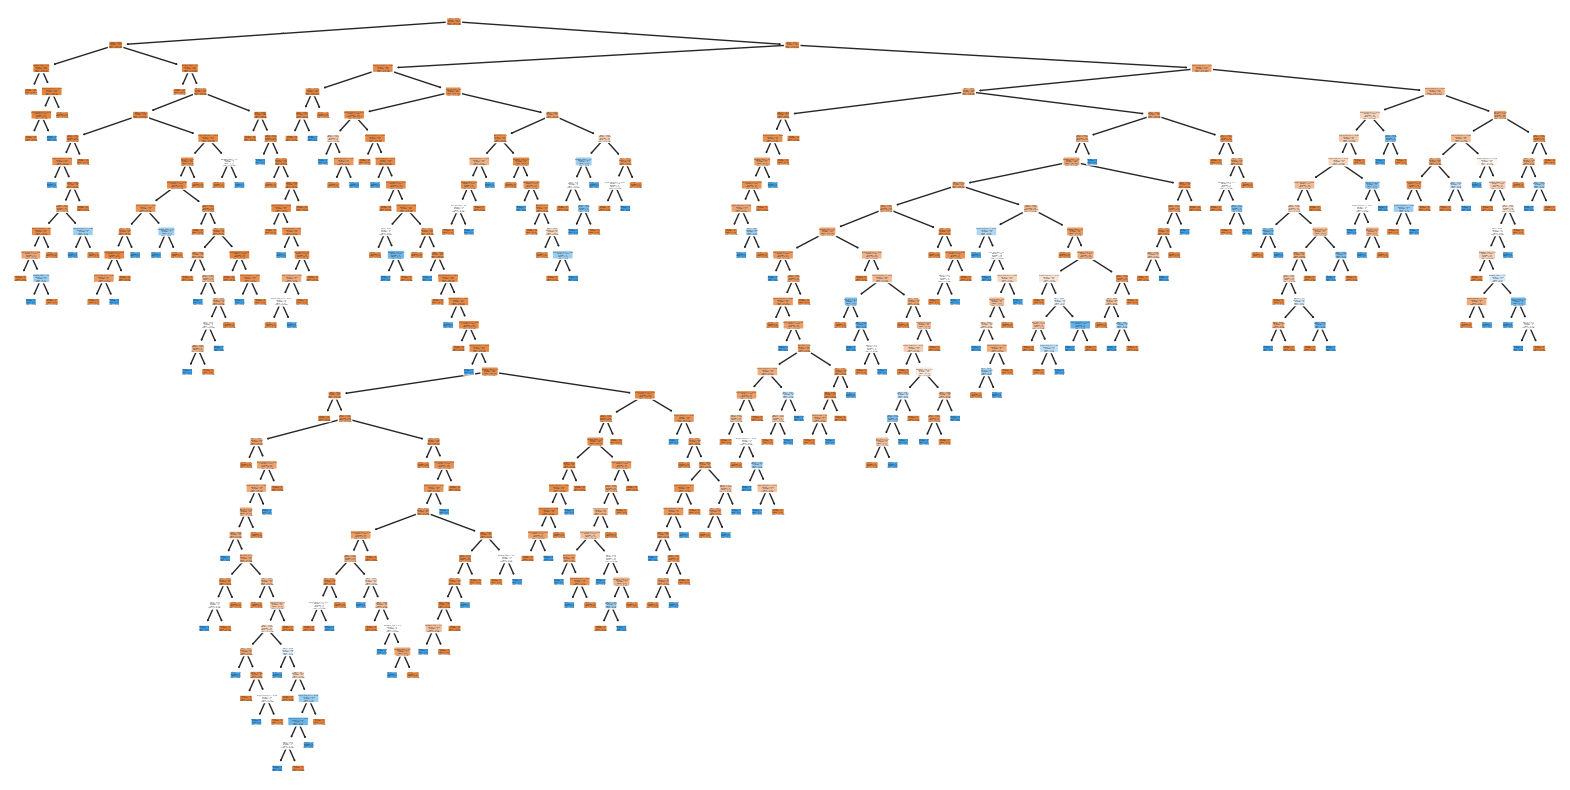

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(clf,
          feature_names=X.columns,  # Feature names from your dataset
          class_names=['No Stroke', 'Stroke'],  # Class names
          filled=True,  # Fill nodes with colors
          rounded=True)  # Rounded edges for better visualization
plt.show()


##### Saving Tree as pdf

In [51]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [52]:
from sklearn.tree import export_graphviz
import graphviz

# Export the Decision Tree to a DOT format
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['No Stroke', 'Stroke'],
                           filled=True,
                           rounded=True)

# Render the DOT file as an image
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as 'decision_tree.pdf'

# Display the tree directly in Colab
graph.view()




'decision_tree.pdf'

In [53]:
import joblib

# Save the model to a file
joblib.dump(clf, 'decision_tree_model.pkl')

print("Model saved as 'decision_tree_model.pkl'")


Model saved as 'decision_tree_model.pkl'


##4.4 Naive Bayes Classifier

###4.4.1 Simple Train_test_split


Naive Bayes Classification Score: 0.8551448551448552


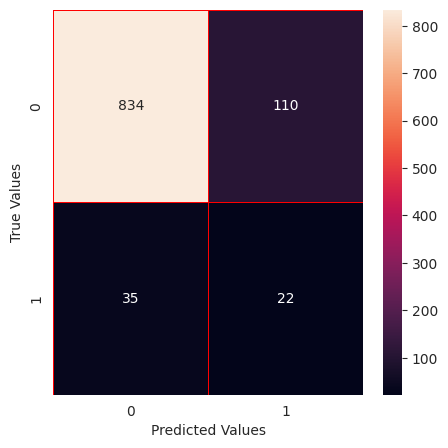

Classification Report for Simple Train test:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       944
           1       0.17      0.39      0.23        57

    accuracy                           0.86      1001
   macro avg       0.56      0.63      0.58      1001
weighted avg       0.91      0.86      0.88      1001



In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
X = df_ready.drop(columns=['stroke'])
y = df_ready['stroke']
x_train, x_test, y_train, y_test =train_test_split_method(X,y)
method_names = []
method_scores = []
naive_bayes_Simple = GaussianNB()
naive_bayes_Simple.fit(x_train,y_train)
print("Naive Bayes Classification Score: {}".format(naive_bayes_Simple.score(x_test,y_test)))
method_names.append("Naive Bayes Simple")
method_scores.append(naive_bayes_Simple.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes_Simple.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print(f"Classification Report for Simple Train test:\n{classification_report(y_test, y_pred)}")

###4.4.2 K-Fold Split Method

Naive Bayes Classification Score for Fold 1: 0.86


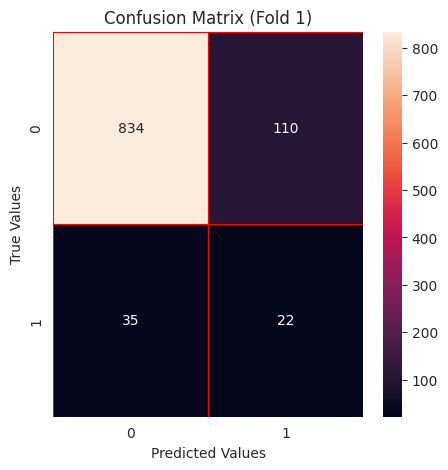

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       944
           1       0.17      0.39      0.23        57

    accuracy                           0.86      1001
   macro avg       0.56      0.63      0.58      1001
weighted avg       0.91      0.86      0.88      1001

Naive Bayes Classification Score for Fold 2: 0.87


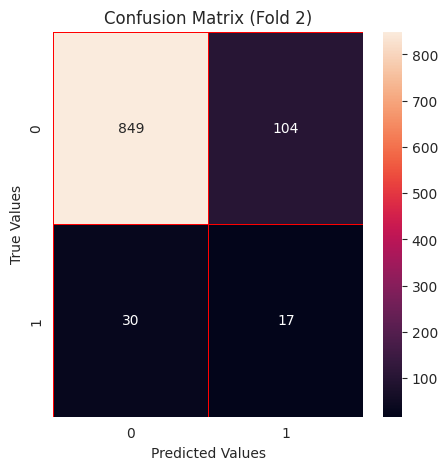

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       953
           1       0.14      0.36      0.20        47

    accuracy                           0.87      1000
   macro avg       0.55      0.63      0.56      1000
weighted avg       0.93      0.87      0.89      1000

Naive Bayes Classification Score for Fold 3: 0.87


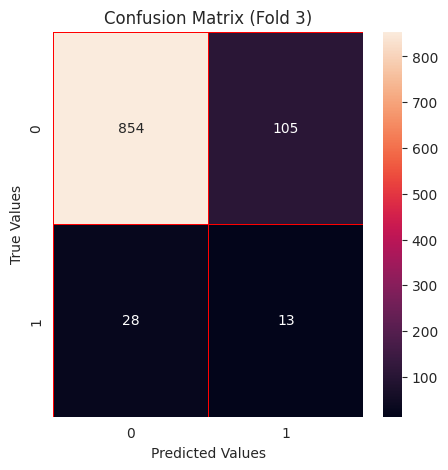

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       959
           1       0.11      0.32      0.16        41

    accuracy                           0.87      1000
   macro avg       0.54      0.60      0.55      1000
weighted avg       0.93      0.87      0.90      1000

Naive Bayes Classification Score for Fold 4: 0.87


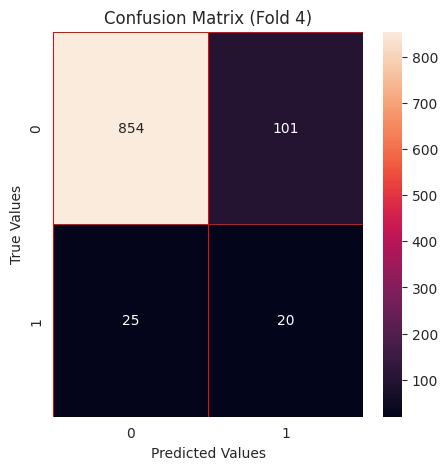

Classification Report for Fold 4:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       955
           1       0.17      0.44      0.24        45

    accuracy                           0.87      1000
   macro avg       0.57      0.67      0.59      1000
weighted avg       0.94      0.87      0.90      1000

Naive Bayes Classification Score for Fold 5: 0.87


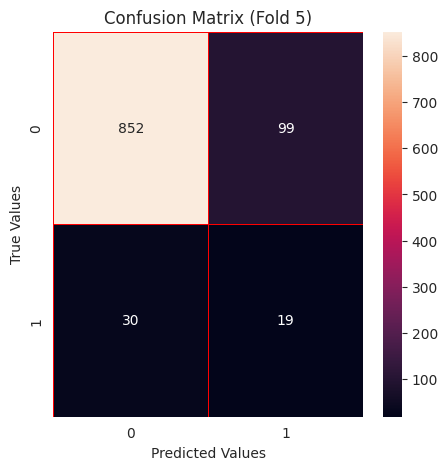

Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       951
           1       0.16      0.39      0.23        49

    accuracy                           0.87      1000
   macro avg       0.56      0.64      0.58      1000
weighted avg       0.93      0.87      0.90      1000

Mean Classification Score: 0.87


In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the classifier
naive_bayes = GaussianNB()

# Data (assumed df_ready is already defined)
X = df_ready.drop(columns=['stroke'])
y = df_ready['stroke']

kfold_method_scores=[]
# Initialize the k-fold cross-validation
for fold, (x_train, x_test, y_train, y_test) in enumerate(k_fold_split_method(X, y, n_splits=5)):
    # Fit the model on the training data
    naive_bayes.fit(x_train, y_train)

    # Evaluate the model on the test data
    score = naive_bayes.score(x_test, y_test)
    print(f"Naive Bayes Classification Score for Fold {fold+1}: {score:.2f}")


    kfold_method_scores.append(score)

    # Confusion Matrix
    y_pred = naive_bayes.predict(x_test)
    conf_mat = confusion_matrix(y_test, y_pred)

    # Visualize Confusion Matrix
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.title(f"Confusion Matrix (Fold {fold+1})")
    plt.show()
    print(f"Classification Report for Fold {fold+1}:\n{classification_report(y_test, y_pred)}")

# Print the mean score across all folds
mean_score = sum(kfold_method_scores) / len(kfold_method_scores)
method_names.append(f"Naive Bayes K-fold mean")
method_scores.append(mean_score)
print(f"Mean Classification Score: {mean_score:.2f}")



###4.4.3 stratified_k_fold_split_method

Naive Bayes Classification Score for Fold 1: 0.89


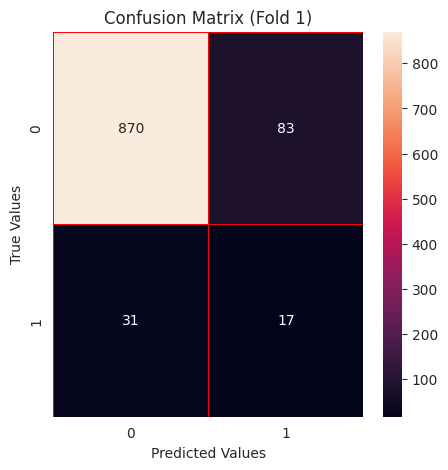

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       953
           1       0.17      0.35      0.23        48

    accuracy                           0.89      1001
   macro avg       0.57      0.63      0.58      1001
weighted avg       0.93      0.89      0.90      1001

Naive Bayes Classification Score for Fold 2: 0.86


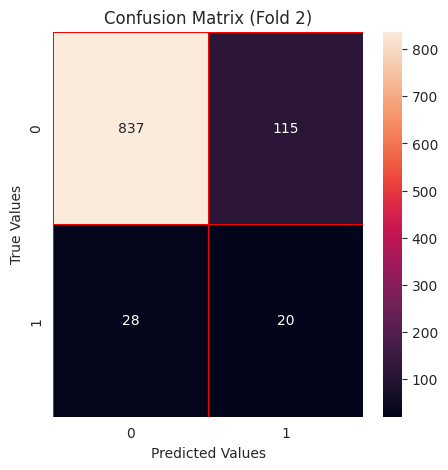

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       952
           1       0.15      0.42      0.22        48

    accuracy                           0.86      1000
   macro avg       0.56      0.65      0.57      1000
weighted avg       0.93      0.86      0.89      1000

Naive Bayes Classification Score for Fold 3: 0.88


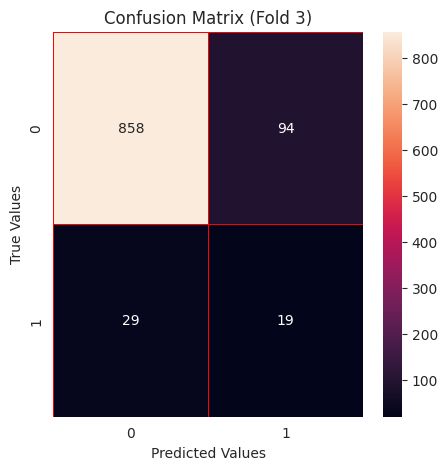

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       952
           1       0.17      0.40      0.24        48

    accuracy                           0.88      1000
   macro avg       0.57      0.65      0.58      1000
weighted avg       0.93      0.88      0.90      1000

Naive Bayes Classification Score for Fold 4: 0.86


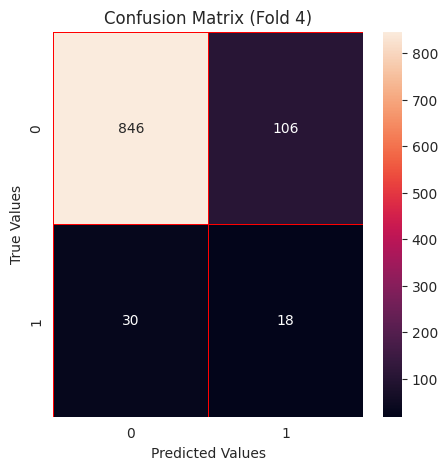

Classification Report for Fold 4:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       952
           1       0.15      0.38      0.21        48

    accuracy                           0.86      1000
   macro avg       0.56      0.63      0.57      1000
weighted avg       0.93      0.86      0.89      1000

Naive Bayes Classification Score for Fold 5: 0.84


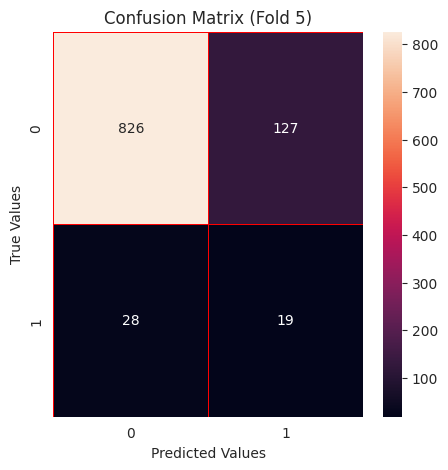

Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       953
           1       0.13      0.40      0.20        47

    accuracy                           0.84      1000
   macro avg       0.55      0.64      0.56      1000
weighted avg       0.93      0.84      0.88      1000

Mean Classification Score: 0.87


In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

naive_bayes = GaussianNB()


X = df_ready.drop(columns=['stroke'])
y = df_ready['stroke']
stratified_method_scores=[]

for fold, (x_train, x_test, y_train, y_test) in enumerate(stratified_k_fold_split_method(X, y, n_splits=5)):
    naive_bayes.fit(x_train, y_train)

    score = naive_bayes.score(x_test, y_test)
    print(f"Naive Bayes Classification Score for Fold {fold+1}: {score:.2f}")
    stratified_method_scores.append(score)
    # Confusion Matrix
    y_pred = naive_bayes.predict(x_test)
    conf_mat = confusion_matrix(y_test, y_pred)

    # Visualize Confusion Matrix
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.title(f"Confusion Matrix (Fold {fold+1})")
    plt.show()
    print(f"Classification Report for Fold {fold+1}:\n{classification_report(y_test, y_pred)}")
# Print the mean score across all folds
mean_score = sum(stratified_method_scores) / len(stratified_method_scores)
method_names.append(f"Naive Bayes stratified K-fold mean")
method_scores.append(mean_score)
print(f"Mean Classification Score: {mean_score:.2f}")

###4.4.4 train_validation_method

Naive Bayes Classification Score: 0.8771228771228772


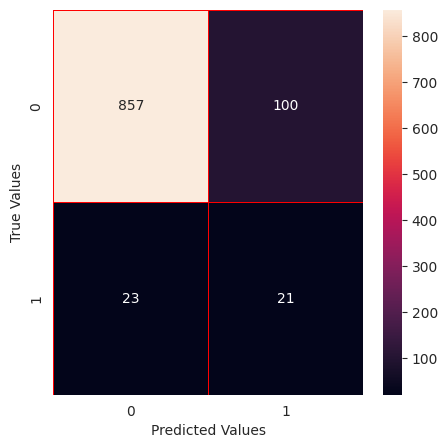

Classification Report for trainVal:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       957
           1       0.17      0.48      0.25        44

    accuracy                           0.88      1001
   macro avg       0.57      0.69      0.59      1001
weighted avg       0.94      0.88      0.90      1001



In [57]:
from sklearn.naive_bayes import GaussianNB
X = df_ready.drop(columns=['stroke'])
y = df_ready['stroke']
x_train,x_val, x_test, y_train,y_val ,y_test = train_val_test_split_method(X,y)

naive_bayes_trainval = GaussianNB()
naive_bayes_trainval.fit(x_train,y_train)
print("Naive Bayes Classification Score: {}".format(naive_bayes_trainval.score(x_test,y_test)))
method_names.append("Naive Bayes trainVal")
method_scores.append(naive_bayes_trainval.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes_trainval.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
print(f"Classification Report for trainVal:\n{classification_report(y_test, y_pred)}")




###Comparing Accuracy

['Naive Bayes Simple', 'Naive Bayes K-fold mean', 'Naive Bayes stratified K-fold mean', 'Naive Bayes trainVal']
                               Method  Accuracy Score
0                  Naive Bayes Simple        0.855145
1             Naive Bayes K-fold mean        0.866629
2  Naive Bayes stratified K-fold mean        0.865823
3                Naive Bayes trainVal        0.877123


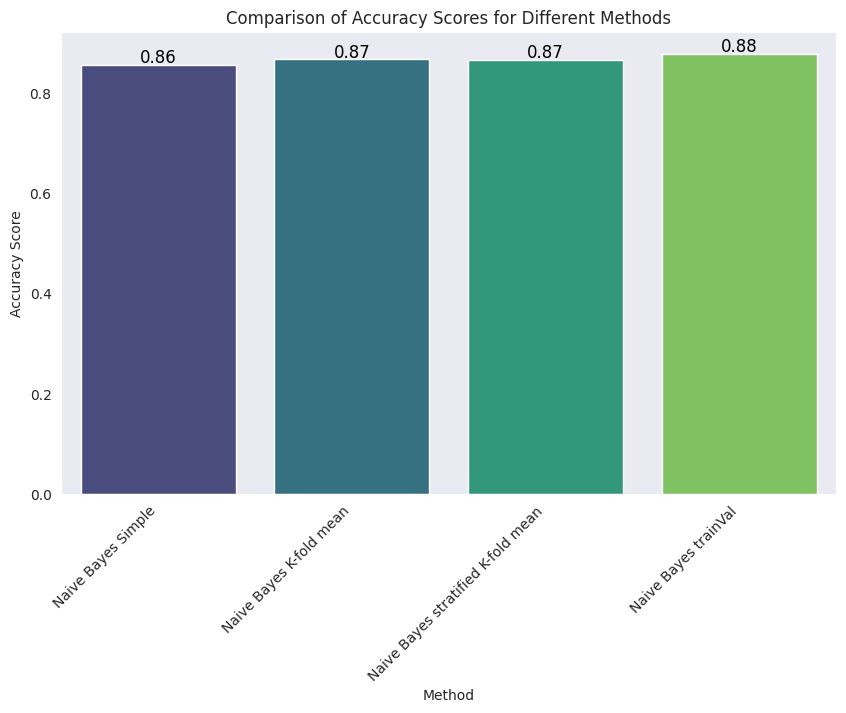

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(method_names)

# Create a DataFrame to store method names and corresponding accuracy scores
results_df = pd.DataFrame({
    'Method': method_names,
    'Accuracy Score': method_scores
})

# Print the DataFrame to display the results
print(results_df)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Method', y='Accuracy Score', data=results_df, palette="viridis")

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha="right")
plt.title("Comparison of Accuracy Scores for Different Methods")
plt.show()




## 4.5 KNN

In [61]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, PredefinedSplit, train_test_split, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
df_ready=pd.read_csv("/content/dataset_after_handling_outliers.csv")
X = df_ready.drop(columns=['stroke'])  # Drop irrelevant columns
y = df_ready['stroke']

# Define KNN model and parameter grid
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance']}


### 4.5.2 K-Fold Split Method

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.922 total time=   0.1s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.915 total time=   0.1s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.930 total time=   0.1s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.908 total time=   0.1s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.926 total time=   0.2s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.922 total time=   0.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.915 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.930 total time=   0.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.908 total time=   0.1s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.926 total time=   0.2s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.937 total time=   0.4s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

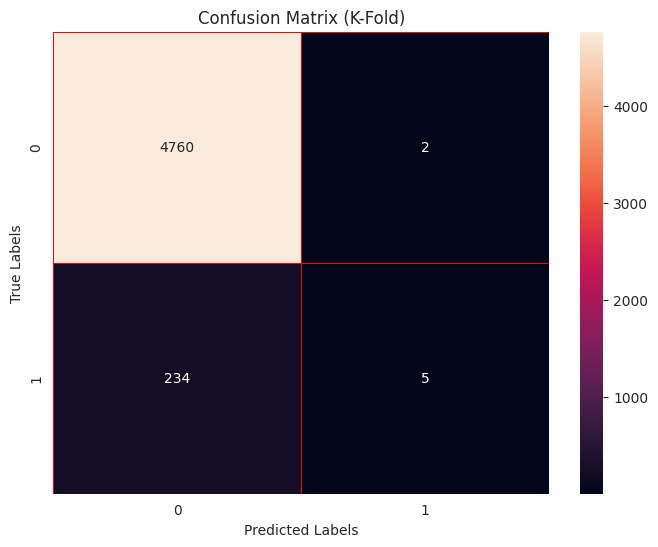

In [62]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 splits for K-Fold


grid_search_kf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, verbose=3)


grid_search_kf.fit(X, y)

kf_score = grid_search_kf.best_score_

print(f'Best Hyperparameters: {grid_search_kf.best_params_}')
print(f'Best Cross-Validation Score: {kf_score}')
print()

best_model = grid_search_kf.best_estimator_
y_pred = best_model.predict(X)


#Predictions and classification report
y_pred_kf = grid_search_kf.best_estimator_.predict(X)
print("Classification Report (K-Fold):")
print(classification_report(y, y_pred_kf))
print()

# Confusion Matrix
conf_matrix_kf = confusion_matrix(y, y_pred_kf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f", xticklabels=grid_search_kf.best_estimator_.classes_, yticklabels=grid_search_kf.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (K-Fold)')
plt.show()


### 4.5.3 Stratified_K_Fold_Split_Method

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.924 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.906 total time=   0.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.901 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.916 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.926 total time=   0.2s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.924 total time=   0.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.906 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.901 total time=   0.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.916 total time=   0.1s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.926 total time=   0.1s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.948 total time=   0.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

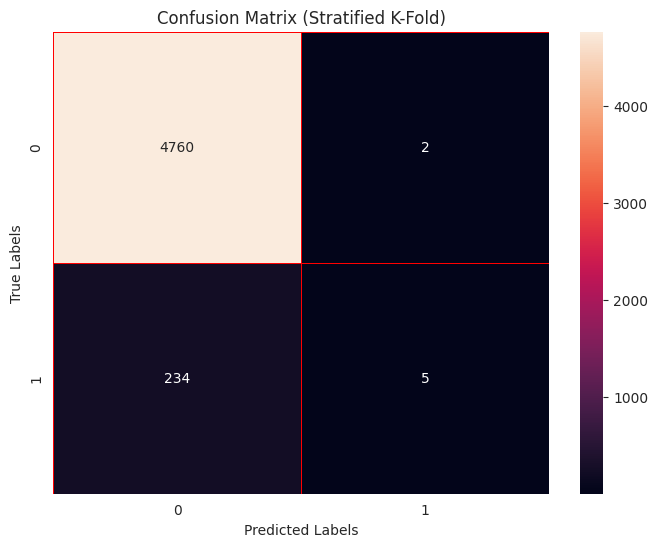

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid_search_sss = GridSearchCV(KNeighborsClassifier(), param_grid, cv=sss, verbose=3)

grid_search_sss.fit(X, y)

sss_score = grid_search_sss.best_score_

print(f'Best Hyperparameters: {sss_score}')
print(f'Best Cross-Validation Score: {sss_score}')
print()

y_pred_sss = grid_search_sss.best_estimator_.predict(X)
print("Classification Report (Stratified K-Fold):")
print(classification_report(y, y_pred_sss))
print()

# Confusion Matrix
conf_matrix_sss = confusion_matrix(y, y_pred_sss)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sss,annot=True,linewidths=0.5,linecolor="red",fmt=".0f", xticklabels=grid_search_sss.best_estimator_.classes_, yticklabels=grid_search_sss.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Stratified K-Fold)')
plt.show()



### 4.5.4 Train_Validation_method

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.937 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.915 total time=   0.1s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.925 total time=   0.1s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.920 total time=   0.1s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.923 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.937 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.915 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.925 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.920 total time=   0.0s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.953 total time=   0.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

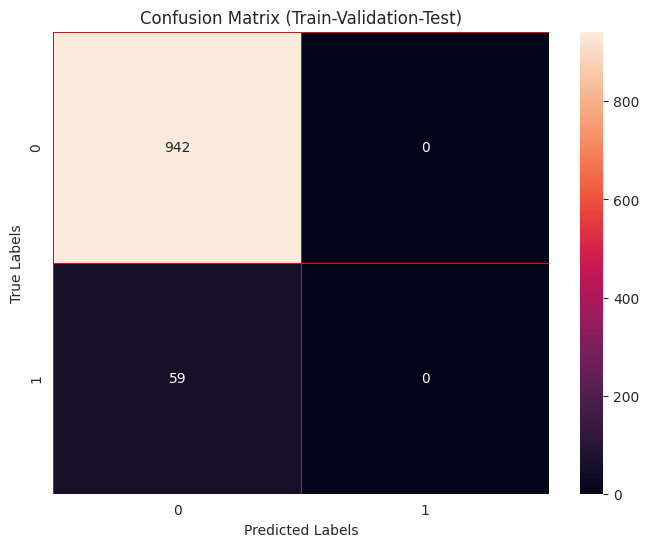

In [64]:
#Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train-val, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 75% train, 25% validation

# Step 3: Perform grid search on the training set
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
gridKNN.fit(X_train, y_train)

# Step 4: Evaluate the best model on the validation set
best_model = gridKNN.best_estimator_
val_score = best_model.score(X_val, y_val)
print(f'Validation Score: {val_score}')

test_score_train_val = best_model.score(X_test, y_test)
# Step 5: Refit the model on the full train-val data and evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Refitting on the combined training and validation set
test_score_train_val = best_model.score(X_test, y_test)
print(f'Test Score: {test_score_train_val}')
print()

y_pred_test = best_model.predict(X_test)
print("Classification Report (Train-Validation-Test):")
print(classification_report(y_test, y_pred_test))
print()

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test,annot=True,linewidths=0.5,linecolor="red",fmt=".0f", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train-Validation-Test)')
plt.show()



### 4.5.5 Comparing Accuarcy

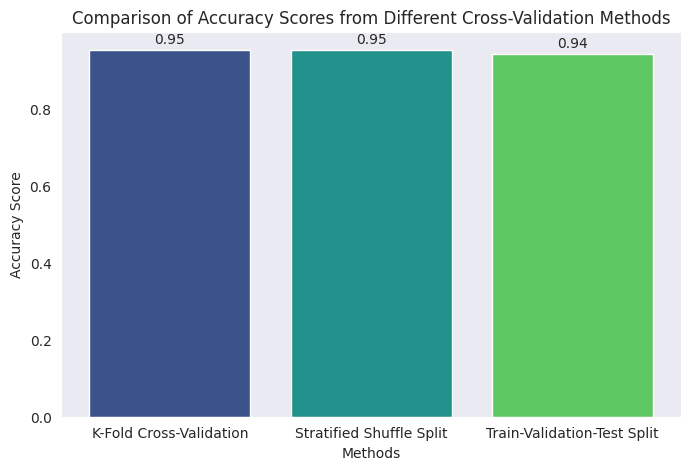


Best method based on highest accuracy: K-Fold Cross-Validation with score: 0.9522117882117882


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare the methods based on accuracy scores
scores = {'K-Fold Cross-Validation': kf_score,
          'Stratified Shuffle Split': sss_score,
          'Train-Validation-Test Split': test_score_train_val}

# Plot the comparison using a bar chart
methods = list(scores.keys())
accuracy_scores = list(scores.values())
viridis_colors = sns.color_palette("viridis", len(methods))

plt.figure(figsize=(8, 5))
plt.bar(methods, accuracy_scores, color=viridis_colors)

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores from Different Cross-Validation Methods')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

# Optionally, print the best method
best_method = max(scores, key=scores.get)
print(f"\nBest method based on highest accuracy: {best_method} with score: {scores[best_method]}")



# Step 5 |Clusters

## DBScan

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the preprocessed dataset
df_ready = pd.read_csv("/content/dataset_after_handling_outliers.csv")

# Drop the target column ('stroke') to focus on the features
X = df_ready.drop(columns=['stroke']).values

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your dataset
clusters = dbscan.fit_predict(X)

# Add cluster labels to the original dataset
df_ready['Cluster'] = clusters

# Inspect cluster counts
print("Cluster counts:")
print(df_ready['Cluster'].value_counts())

# Save the dataset with cluster labels
df_ready.to_csv("/content/dataset_with_clusters.csv", index=False)

# Optional: Visualize clusters if possible (e.g., PCA for dimensionality reduction)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()#=
#Summery of the cluster
# Print cluster summary
cluster_summary = df_ready.groupby('Cluster').mean()
print("Cluster Summary (Mean of Features):")
print(cluster_summary)

# Count the number of samples in each cluster
cluster_counts = df_ready['Cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

# Check outliers (Cluster -1)
num_outliers = cluster_counts.get(-1, 0)
print(f"\nNumber of Outliers (Cluster -1): {num_outliers}")



## Agglomerative

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_ready = pd.read_csv("/content/dataset_after_handling_outliers.csv")
# Assuming df_ready is preprocessed and contains only numerical columns for clustering
X = df_ready.drop(columns=['stroke'], errors='ignore')  # Drop target column if exists

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
df_ready['cluster'] = agg_clustering.fit_predict(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_ready['cluster']

# Visualize clusters in 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('PCA Visualization of Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print cluster summary
cluster_summary = df_ready['cluster'].value_counts().reset_index()
cluster_summary.columns = ['Cluster', 'Count']
print("Cluster Summary:\n", cluster_summary)

# Save the clustered dataset with PCA components
df_ready.to_csv('dataset_with_clusters_agglomerative.csv', index=False)